In [2]:
from math import sqrt
import copy
import  traceback
import shutil
import random

import numpy as np  # linear algebra
import pydicom
import os
import matplotlib.pyplot as plt
import cv2
from pydicom.uid import UID
from PIL import Image
from tqdm import tqdm

In [3]:
def load_scan(path):
    slices = [] #slices = [pydicom.dcmread(path + '/' + s) for s in filter(lambda x: x.endswith('.dcm'), os.listdir(path))]
    for s in os.listdir(path):
        if not s.endswith('.dcm'):
            continue
        sl = pydicom.dcmread(os.path.join(path, s))
        try:
            sl_p = sl.pixel_array
        except AttributeError:
            traceback.print_exc()
            print(f'\tDelete {os.path.join(path, s)}')
            os.remove(os.path.join(path, s))
        else:
            slices.append(sl)
    slices.sort(key=lambda x: float(x.InstanceNumber))
    return slices

In [4]:
lower_b, upper_b = -100, 500

## 1.阳性数据

In [56]:
# 将dcm文件根据窗宽窗位转化为png图片
def generate_image(input_folder):
    for patient in sorted(os.listdir(input_folder)):
        if os.path.isfile(os.path.join(input_folder, patient)):
            continue
        print(f'****Processing {patient}****')
        for scan in os.listdir(os.path.join(input_folder, patient)):
            if scan != '1':
                continue
            name = patient #name = patient.split('-')[0]
            image_path = os.path.join(input_folder, patient, scan, f'images_{lower_b}_{upper_b}')
            if os.path.exists(image_path):
                shutil.rmtree(image_path)
            os.mkdir(image_path)

            ct = load_scan(os.path.join(input_folder, patient, scan))

            for i in range(len(ct)):
                img = ct[i].pixel_array.astype(np.int16)
                intercept = ct[i].RescaleIntercept
                slope = ct[i].RescaleSlope
                if slope != 1:
                    img = (slope * img.astype(np.float64)).astype(np.int16)
                img += np.int16(intercept)
                img = np.clip(img, lower_b, upper_b)
                img = ((img-lower_b)/(upper_b-lower_b)*255).astype(np.uint8)
                img = Image.fromarray(img)
                img.save(os.path.join(image_path, f'{name}_{i:04d}.png'))

# generate_image('/nfs3-p1/zsxm/dataset/2021-9-8/')
# generate_image('/nfs3-p1/zsxm/dataset/2021-9-13/')
# generate_image('/nfs3-p1/zsxm/dataset/2021-9-19/')
# generate_image('/nfs3-p1/zsxm/dataset/2021-9-28/')
generate_image('/nfs3-p2/zsxm/dataset/2021-10-19-imh/')
generate_image('/nfs3-p2/zsxm/dataset/2021-10-19-pau/')
generate_image('/nfs3-p2/zsxm/dataset/2021-10-19-aa/')

****Processing chencaixi-J-16-53****
****Processing chenchanglu-J-142-168****
****Processing chengchunxiao-S-39-57-J-39-93****
****Processing chenyiqing-J-69-117****
****Processing chenyouli-J-34-93****
****Processing chenzhiqing-J-19-55****
****Processing dengxiuzhu-S-27-47-J-27-86****
****Processing fangmengzhen-J-20-73****
****Processing guanzaihua-J-25-61****
****Processing heazi-S-16-30****
****Processing hezhengmin-J-24-74****
****Processing hongshunchang-J-26-89****
****Processing huangbaichao-J-31-105****
****Processing hucailu-J-32-55****
****Processing huyaxiang-J-40-89****
****Processing huyingfu-S-31-39-J-31-105****
****Processing jiangbihua-S-21-30-J-21-55****
****Processing jiangjianping-J-17-63****
****Processing jiangqianfeng-J-35-98****
****Processing jiatiandeng-S-41-55-J-41-142****
****Processing jinguoqing-S-15-24-J-15-76****
****Processing kebaoming-S-29-40****
****Processing laidaishan-J-24-47****
****Processing lichengqian-J-35-100****
****Processing liguihua-S-2

Traceback (most recent call last):
  File "/tmp/ipykernel_37964/486662372.py", line 8, in load_scan
    sl_p = sl.pixel_array
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 836, in __getattr__
    return object.__getattribute__(self, name)
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1882, in pixel_array
    self.convert_pixel_data()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1444, in convert_pixel_data
    self._convert_pixel_data_without_handler()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1556, in _convert_pixel_data_without_handler
    raise last_exception  # type: ignore[misc]
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1536, in _convert_pixel_data_without_handler
    self._do_pixel_data_conversion(handler)
  File "/d

	Delete /nfs3-p2/zsxm/dataset/2021-10-19-pau/qiujinrong-J-33-57-J-78-125-J-137-158/1/1-009E.dcm
****Processing qiumeijun-J-45-52****
****Processing quanjianzhong-S-32-35****
****Processing rongjiliang-J-31-43****
****Processing shengyueqin-J-21-41****
****Processing songguoan-J-30-40****
****Processing suzhijing-J-51-55****
****Processing tuchenghe-J-90-123****
****Processing tuhuadong-J-22-30****
****Processing wangbaosheng-J-57-87****
****Processing wangdeqian-J-36-123****
****Processing wangdequan-J-25-121****
****Processing wangguoping-J-31-94****
****Processing wangshiyao-J-46-139****
****Processing wangyeping-J-69-78****
****Processing wugenbao-J-16-78****
****Processing xiahongsheng-J-24-86****
****Processing xiangbaiquan-J-38-100****
****Processing xingwenqu-J-24-53****
****Processing xuping-J-35-79****
****Processing xuwenxiang-J-50-67****
****Processing yingguocheng-J-48-54****
****Processing yujianshun-S-19-20****
****Processing yuxingguan-J-25-30****
****Processing zengchen

Traceback (most recent call last):
  File "/tmp/ipykernel_37964/486662372.py", line 8, in load_scan
    sl_p = sl.pixel_array
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 836, in __getattr__
    return object.__getattribute__(self, name)
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1882, in pixel_array
    self.convert_pixel_data()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1444, in convert_pixel_data
    self._convert_pixel_data_without_handler()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1556, in _convert_pixel_data_without_handler
    raise last_exception  # type: ignore[misc]
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1536, in _convert_pixel_data_without_handler
    self._do_pixel_data_conversion(handler)
  File "/d

	Delete /nfs3-p2/zsxm/dataset/2021-10-19-pau/zhengaizhu-S-26-29-J-52-56/1/1-00C7.dcm
****Processing zhengxiusheng-S-26-27****
****Processing zhongjianhong-J-29-63****
****Processing zhongzhongnan-J-22-37****
****Processing zhougensheng-S-39-42****
****Processing zhourongcheng-J-80-93****
****Processing zhouxincang-J-40-97****
****Processing zhujianping-J-31-34****
****Processing baoguizhi-J-111-138****


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/486662372.py", line 8, in load_scan
    sl_p = sl.pixel_array
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 836, in __getattr__
    return object.__getattribute__(self, name)
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1882, in pixel_array
    self.convert_pixel_data()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1444, in convert_pixel_data
    self._convert_pixel_data_without_handler()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1556, in _convert_pixel_data_without_handler
    raise last_exception  # type: ignore[misc]
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1536, in _convert_pixel_data_without_handler
    self._do_pixel_data_conversion(handler)
  File "/d

	Delete /nfs3-p2/zsxm/dataset/2021-10-19-aa/baoguizhi-J-111-138/1/1-00CA.dcm
****Processing caicunyuan-S-23-26****
****Processing changyifan-S-72-80****
****Processing chenfengxian-S-32-43****
****Processing chengrenhua-S-35-45****
****Processing chenguoming-S-57-67****
****Processing chenjufang-S-31-42****
****Processing chenjunliang-S-46-58****
****Processing chenlingdi-J-103-127****


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/486662372.py", line 8, in load_scan
    sl_p = sl.pixel_array
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 836, in __getattr__
    return object.__getattribute__(self, name)
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1882, in pixel_array
    self.convert_pixel_data()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1444, in convert_pixel_data
    self._convert_pixel_data_without_handler()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1556, in _convert_pixel_data_without_handler
    raise last_exception  # type: ignore[misc]
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1536, in _convert_pixel_data_without_handler
    self._do_pixel_data_conversion(handler)
  File "/d

	Delete /nfs3-p2/zsxm/dataset/2021-10-19-aa/chenlingdi-J-103-127/1/1-00C7.dcm
****Processing chenweiming-J-88-99****
****Processing chenyegen-S-54-59****
****Processing chuxingnan-S-30-34****
****Processing cuiruxing-S-47-54****
****Processing dingbilian-S-44-57****
****Processing dujiang-S-33-37****
****Processing fanghonghong-J-128-149****
****Processing fubaoheng-S-24-35****
****Processing fuyingliang-S-48-62****


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/486662372.py", line 8, in load_scan
    sl_p = sl.pixel_array
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 836, in __getattr__
    return object.__getattribute__(self, name)
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1882, in pixel_array
    self.convert_pixel_data()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1444, in convert_pixel_data
    self._convert_pixel_data_without_handler()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1556, in _convert_pixel_data_without_handler
    raise last_exception  # type: ignore[misc]
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1536, in _convert_pixel_data_without_handler
    self._do_pixel_data_conversion(handler)
  File "/d

	Delete /nfs3-p2/zsxm/dataset/2021-10-19-aa/fuyingliang-S-48-62/1/1-00D6.dcm
****Processing gancaiping-S-43-48****
****Processing guoguican-J-75-77****


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/486662372.py", line 8, in load_scan
    sl_p = sl.pixel_array
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 836, in __getattr__
    return object.__getattribute__(self, name)
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1882, in pixel_array
    self.convert_pixel_data()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1444, in convert_pixel_data
    self._convert_pixel_data_without_handler()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1556, in _convert_pixel_data_without_handler
    raise last_exception  # type: ignore[misc]
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1536, in _convert_pixel_data_without_handler
    self._do_pixel_data_conversion(handler)
  File "/d

	Delete /nfs3-p2/zsxm/dataset/2021-10-19-aa/guoguican-J-75-77/1/1-0075.dcm
****Processing guronghua-S-30-33****
****Processing gushiheng-J-47-68****
****Processing guxinmei-S-27-33****
****Processing helvtang-J-129-140****
****Processing heziquan-J-124-133****


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/486662372.py", line 8, in load_scan
    sl_p = sl.pixel_array
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 836, in __getattr__
    return object.__getattribute__(self, name)
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1882, in pixel_array
    self.convert_pixel_data()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1444, in convert_pixel_data
    self._convert_pixel_data_without_handler()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1556, in _convert_pixel_data_without_handler
    raise last_exception  # type: ignore[misc]
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1536, in _convert_pixel_data_without_handler
    self._do_pixel_data_conversion(handler)
  File "/d

	Delete /nfs3-p2/zsxm/dataset/2021-10-19-aa/heziquan-J-124-133/1/1-00BB.dcm
****Processing hongshuirong-S-28-42****


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/486662372.py", line 8, in load_scan
    sl_p = sl.pixel_array
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 836, in __getattr__
    return object.__getattribute__(self, name)
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1882, in pixel_array
    self.convert_pixel_data()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1444, in convert_pixel_data
    self._convert_pixel_data_without_handler()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1556, in _convert_pixel_data_without_handler
    raise last_exception  # type: ignore[misc]
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1536, in _convert_pixel_data_without_handler
    self._do_pixel_data_conversion(handler)
  File "/d

	Delete /nfs3-p2/zsxm/dataset/2021-10-19-aa/hongshuirong-S-28-42/1/1-00B4.dcm
****Processing huangfujuan-S-61-68****


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/486662372.py", line 8, in load_scan
    sl_p = sl.pixel_array
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 836, in __getattr__
    return object.__getattribute__(self, name)
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1882, in pixel_array
    self.convert_pixel_data()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1444, in convert_pixel_data
    self._convert_pixel_data_without_handler()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1556, in _convert_pixel_data_without_handler
    raise last_exception  # type: ignore[misc]
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1536, in _convert_pixel_data_without_handler
    self._do_pixel_data_conversion(handler)
  File "/d

	Delete /nfs3-p2/zsxm/dataset/2021-10-19-aa/huangfujuan-S-61-68/1/1-0107.dcm
****Processing huangxiaogen-J-100-118****


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/486662372.py", line 8, in load_scan
    sl_p = sl.pixel_array
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 836, in __getattr__
    return object.__getattribute__(self, name)
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1882, in pixel_array
    self.convert_pixel_data()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1444, in convert_pixel_data
    self._convert_pixel_data_without_handler()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1556, in _convert_pixel_data_without_handler
    raise last_exception  # type: ignore[misc]
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1536, in _convert_pixel_data_without_handler
    self._do_pixel_data_conversion(handler)
  File "/d

	Delete /nfs3-p2/zsxm/dataset/2021-10-19-aa/huangxiaogen-J-100-118/1/1-00B9.dcm
****Processing hujiangxiang-S-53-58****
****Processing jiangkaishui-S-25-27****
****Processing jiangxiaowei-J-37-40****
****Processing jiangyaling-S-29-42****


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/486662372.py", line 8, in load_scan
    sl_p = sl.pixel_array
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 836, in __getattr__
    return object.__getattribute__(self, name)
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1882, in pixel_array
    self.convert_pixel_data()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1444, in convert_pixel_data
    self._convert_pixel_data_without_handler()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1556, in _convert_pixel_data_without_handler
    raise last_exception  # type: ignore[misc]
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1536, in _convert_pixel_data_without_handler
    self._do_pixel_data_conversion(handler)
  File "/d

	Delete /nfs3-p2/zsxm/dataset/2021-10-19-aa/jiangyaling-S-29-42/1/1-00CC.dcm
****Processing jinline-S-19-26****
****Processing kangzhenzhong-S-33-38****
****Processing kongxiangbao-S-59-69****
****Processing kongxiuchun-S-57-71****


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/486662372.py", line 8, in load_scan
    sl_p = sl.pixel_array
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 836, in __getattr__
    return object.__getattribute__(self, name)
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1882, in pixel_array
    self.convert_pixel_data()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1444, in convert_pixel_data
    self._convert_pixel_data_without_handler()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1556, in _convert_pixel_data_without_handler
    raise last_exception  # type: ignore[misc]
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1536, in _convert_pixel_data_without_handler
    self._do_pixel_data_conversion(handler)
  File "/d

	Delete /nfs3-p2/zsxm/dataset/2021-10-19-aa/kongxiuchun-S-57-71/1/1-008C.dcm
****Processing laibaozhu-J-22-28****
****Processing laiyong-J-31-47****
****Processing leihexiang-J-24-27****
****Processing liujun-J-46-61****
****Processing louaizhen-S-20-30****
****Processing lubihua-S-27-46****


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/486662372.py", line 8, in load_scan
    sl_p = sl.pixel_array
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 836, in __getattr__
    return object.__getattribute__(self, name)
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1882, in pixel_array
    self.convert_pixel_data()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1444, in convert_pixel_data
    self._convert_pixel_data_without_handler()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1556, in _convert_pixel_data_without_handler
    raise last_exception  # type: ignore[misc]
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1536, in _convert_pixel_data_without_handler
    self._do_pixel_data_conversion(handler)
  File "/d

	Delete /nfs3-p2/zsxm/dataset/2021-10-19-aa/lubihua-S-27-46/1/1-00CA.dcm
****Processing lugenqian-S-41-59****


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/486662372.py", line 8, in load_scan
    sl_p = sl.pixel_array
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 836, in __getattr__
    return object.__getattribute__(self, name)
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1882, in pixel_array
    self.convert_pixel_data()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1444, in convert_pixel_data
    self._convert_pixel_data_without_handler()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1556, in _convert_pixel_data_without_handler
    raise last_exception  # type: ignore[misc]
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1536, in _convert_pixel_data_without_handler
    self._do_pixel_data_conversion(handler)
  File "/d

	Delete /nfs3-p2/zsxm/dataset/2021-10-19-aa/lugenqian-S-41-59/1/1-00D4.dcm
****Processing luguilin-S-36-49****
****Processing luoxianwu-J-43-63****
****Processing lvhanfang-S-34-40****
****Processing maomao-J-45-51****
****Processing nishengwei-S-64-74****


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/486662372.py", line 8, in load_scan
    sl_p = sl.pixel_array
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 836, in __getattr__
    return object.__getattribute__(self, name)
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1882, in pixel_array
    self.convert_pixel_data()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1444, in convert_pixel_data
    self._convert_pixel_data_without_handler()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1556, in _convert_pixel_data_without_handler
    raise last_exception  # type: ignore[misc]
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1536, in _convert_pixel_data_without_handler
    self._do_pixel_data_conversion(handler)
  File "/d

	Delete /nfs3-p2/zsxm/dataset/2021-10-19-aa/nishengwei-S-64-74/1/1-0099.dcm
****Processing panguangwen-S-24-29****


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/486662372.py", line 8, in load_scan
    sl_p = sl.pixel_array
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 836, in __getattr__
    return object.__getattribute__(self, name)
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1882, in pixel_array
    self.convert_pixel_data()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1444, in convert_pixel_data
    self._convert_pixel_data_without_handler()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1556, in _convert_pixel_data_without_handler
    raise last_exception  # type: ignore[misc]
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1536, in _convert_pixel_data_without_handler
    self._do_pixel_data_conversion(handler)
  File "/d

	Delete /nfs3-p2/zsxm/dataset/2021-10-19-aa/panguangwen-S-24-29/1/1-008C.dcm
****Processing panxianghua-J-40-46****
****Processing qianqiliang-J-43-49****
****Processing shanmingdong-S-49-53****
****Processing shaofeng-S-29-37****
****Processing shenfabiao-S-43-60****
****Processing shenhuinian-S-28-33****
****Processing shenshuigen-S-43-56****
****Processing shensongping-J-48-67****


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/486662372.py", line 8, in load_scan
    sl_p = sl.pixel_array
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 836, in __getattr__
    return object.__getattribute__(self, name)
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1882, in pixel_array
    self.convert_pixel_data()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1444, in convert_pixel_data
    self._convert_pixel_data_without_handler()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1556, in _convert_pixel_data_without_handler
    raise last_exception  # type: ignore[misc]
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1536, in _convert_pixel_data_without_handler
    self._do_pixel_data_conversion(handler)
  File "/d

	Delete /nfs3-p2/zsxm/dataset/2021-10-19-aa/shensongping-J-48-67/1/1-008E.dcm
****Processing shentuduanyang-S-44-55****
****Processing tongyanwen-S-31-41****
****Processing wangchengshe-S-44-48****


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/486662372.py", line 8, in load_scan
    sl_p = sl.pixel_array
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 836, in __getattr__
    return object.__getattribute__(self, name)
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1882, in pixel_array
    self.convert_pixel_data()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1444, in convert_pixel_data
    self._convert_pixel_data_without_handler()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1556, in _convert_pixel_data_without_handler
    raise last_exception  # type: ignore[misc]
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1536, in _convert_pixel_data_without_handler
    self._do_pixel_data_conversion(handler)
  File "/d

	Delete /nfs3-p2/zsxm/dataset/2021-10-19-aa/wangchengshe-S-44-48/1/1-00BF.dcm
****Processing wanghongchu-S-48-66****
****Processing wangshuilin-S-51-58****
****Processing wangxiaozhong-S-18-28****
****Processing wangxiue-J-26-96****


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/486662372.py", line 8, in load_scan
    sl_p = sl.pixel_array
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 836, in __getattr__
    return object.__getattribute__(self, name)
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1882, in pixel_array
    self.convert_pixel_data()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1444, in convert_pixel_data
    self._convert_pixel_data_without_handler()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1556, in _convert_pixel_data_without_handler
    raise last_exception  # type: ignore[misc]
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1536, in _convert_pixel_data_without_handler
    self._do_pixel_data_conversion(handler)
  File "/d

	Delete /nfs3-p2/zsxm/dataset/2021-10-19-aa/wangxiue-J-26-96/1/1-00D8.dcm
****Processing wangyouxing-S-59-67****
****Processing weijilin-J-76-91****


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/486662372.py", line 8, in load_scan
    sl_p = sl.pixel_array
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 836, in __getattr__
    return object.__getattribute__(self, name)
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1882, in pixel_array
    self.convert_pixel_data()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1444, in convert_pixel_data
    self._convert_pixel_data_without_handler()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1556, in _convert_pixel_data_without_handler
    raise last_exception  # type: ignore[misc]
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1536, in _convert_pixel_data_without_handler
    self._do_pixel_data_conversion(handler)
  File "/d

	Delete /nfs3-p2/zsxm/dataset/2021-10-19-aa/weijilin-J-76-91/1/1-00CE.dcm
****Processing weiwanbo-S-24-41****


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/486662372.py", line 8, in load_scan
    sl_p = sl.pixel_array
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 836, in __getattr__
    return object.__getattribute__(self, name)
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1882, in pixel_array
    self.convert_pixel_data()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1444, in convert_pixel_data
    self._convert_pixel_data_without_handler()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1556, in _convert_pixel_data_without_handler
    raise last_exception  # type: ignore[misc]
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1536, in _convert_pixel_data_without_handler
    self._do_pixel_data_conversion(handler)
  File "/d

	Delete /nfs3-p2/zsxm/dataset/2021-10-19-aa/weiwanbo-S-24-41/1/1-007A.dcm
****Processing wupingzhen-S-20-27****
****Processing wuquanxin-J-117-124****
****Processing wusunqing-S-27-32****
****Processing wuyuanfu-J-22-25****
****Processing wuzhongqiu-S-39-56****
****Processing xiaofuxing-S-36-51****
****Processing xucaifeng-S-39-43****
****Processing xuchanghua-J-125-131****


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/486662372.py", line 8, in load_scan
    sl_p = sl.pixel_array
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 836, in __getattr__
    return object.__getattribute__(self, name)
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1882, in pixel_array
    self.convert_pixel_data()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1444, in convert_pixel_data
    self._convert_pixel_data_without_handler()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1556, in _convert_pixel_data_without_handler
    raise last_exception  # type: ignore[misc]
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1536, in _convert_pixel_data_without_handler
    self._do_pixel_data_conversion(handler)
  File "/d

	Delete /nfs3-p2/zsxm/dataset/2021-10-19-aa/xuchanghua-J-125-131/1/1-00CB.dcm
****Processing xufu-S-35-53****


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/486662372.py", line 8, in load_scan
    sl_p = sl.pixel_array
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 836, in __getattr__
    return object.__getattribute__(self, name)
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1882, in pixel_array
    self.convert_pixel_data()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1444, in convert_pixel_data
    self._convert_pixel_data_without_handler()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1556, in _convert_pixel_data_without_handler
    raise last_exception  # type: ignore[misc]
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1536, in _convert_pixel_data_without_handler
    self._do_pixel_data_conversion(handler)
  File "/d

	Delete /nfs3-p2/zsxm/dataset/2021-10-19-aa/xufu-S-35-53/1/1-00D5.dcm
****Processing xujianhua-S-22-31****
****Processing xuke-J-110-120****
****Processing yangjinxian-S-34-46****
****Processing yangkanghe-S-43-61****
****Processing yangyunxian-J-103-110****
****Processing yaoae-S-42-60****
****Processing yechunju-J-29-38****
****Processing yeyunhai-J-142-147****
****Processing yuguobin-S-27-59****


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/486662372.py", line 8, in load_scan
    sl_p = sl.pixel_array
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 836, in __getattr__
    return object.__getattribute__(self, name)
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1882, in pixel_array
    self.convert_pixel_data()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1444, in convert_pixel_data
    self._convert_pixel_data_without_handler()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1556, in _convert_pixel_data_without_handler
    raise last_exception  # type: ignore[misc]
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1536, in _convert_pixel_data_without_handler
    self._do_pixel_data_conversion(handler)
  File "/d

	Delete /nfs3-p2/zsxm/dataset/2021-10-19-aa/yuguobin-S-27-59/1/1-00BC.dcm
****Processing yumeizhen-S-38-51****
****Processing zhangbaoyou-S-46-59****
****Processing zhangjun-J-70-82****
****Processing zhanglifang-J-106-114****
****Processing zhanglugen-S-45-47****


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/486662372.py", line 8, in load_scan
    sl_p = sl.pixel_array
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 836, in __getattr__
    return object.__getattribute__(self, name)
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1882, in pixel_array
    self.convert_pixel_data()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1444, in convert_pixel_data
    self._convert_pixel_data_without_handler()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1556, in _convert_pixel_data_without_handler
    raise last_exception  # type: ignore[misc]
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1536, in _convert_pixel_data_without_handler
    self._do_pixel_data_conversion(handler)
  File "/d

	Delete /nfs3-p2/zsxm/dataset/2021-10-19-aa/zhanglugen-S-45-47/1/1-008B.dcm
****Processing zhangmeijuan-J-15-19****


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/486662372.py", line 8, in load_scan
    sl_p = sl.pixel_array
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 836, in __getattr__
    return object.__getattribute__(self, name)
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1882, in pixel_array
    self.convert_pixel_data()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1444, in convert_pixel_data
    self._convert_pixel_data_without_handler()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1556, in _convert_pixel_data_without_handler
    raise last_exception  # type: ignore[misc]
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1536, in _convert_pixel_data_without_handler
    self._do_pixel_data_conversion(handler)
  File "/d

	Delete /nfs3-p2/zsxm/dataset/2021-10-19-aa/zhangmeijuan-J-15-19/1/1-007F.dcm
****Processing zhangsengao-S-21-27****
****Processing zhangshenhong-J-36-48****


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/486662372.py", line 8, in load_scan
    sl_p = sl.pixel_array
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 836, in __getattr__
    return object.__getattribute__(self, name)
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1882, in pixel_array
    self.convert_pixel_data()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1444, in convert_pixel_data
    self._convert_pixel_data_without_handler()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1556, in _convert_pixel_data_without_handler
    raise last_exception  # type: ignore[misc]
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1536, in _convert_pixel_data_without_handler
    self._do_pixel_data_conversion(handler)
  File "/d

	Delete /nfs3-p2/zsxm/dataset/2021-10-19-aa/zhangshenhong-J-36-48/1/1-00C2.dcm
****Processing zhangweiyong-S-49-55****
****Processing zhangyanjun-S-31-35****
****Processing zhangyinhai-J-72-80****
****Processing zhaofaqin-S-39-53****
****Processing zhengxihong-S-22-29****


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/486662372.py", line 8, in load_scan
    sl_p = sl.pixel_array
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 836, in __getattr__
    return object.__getattribute__(self, name)
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1882, in pixel_array
    self.convert_pixel_data()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1444, in convert_pixel_data
    self._convert_pixel_data_without_handler()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1556, in _convert_pixel_data_without_handler
    raise last_exception  # type: ignore[misc]
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1536, in _convert_pixel_data_without_handler
    self._do_pixel_data_conversion(handler)
  File "/d

	Delete /nfs3-p2/zsxm/dataset/2021-10-19-aa/zhengxihong-S-22-29/1/1-0079.dcm
****Processing zhoujuqin-S-41-62****


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/486662372.py", line 8, in load_scan
    sl_p = sl.pixel_array
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 836, in __getattr__
    return object.__getattribute__(self, name)
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1882, in pixel_array
    self.convert_pixel_data()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1444, in convert_pixel_data
    self._convert_pixel_data_without_handler()
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1556, in _convert_pixel_data_without_handler
    raise last_exception  # type: ignore[misc]
  File "/disk1/zsxm/miniconda3/envs/pytorch/lib/python3.8/site-packages/pydicom/dataset.py", line 1536, in _convert_pixel_data_without_handler
    self._do_pixel_data_conversion(handler)
  File "/d

	Delete /nfs3-p2/zsxm/dataset/2021-10-19-aa/zhoujuqin-S-41-62/1/1-009E.dcm
****Processing zhoushuimu-J-112-115****
****Processing zhoutucai-J-43-50-S-69-74****
****Processing zhouwudi-J-43-49****
****Processing zhucaiqin-S-32-49****
****Processing zhuxingfu-S-21-31****
****Processing zhuzhiying-S-22-37****


In [49]:
# 将各个病例中的png图片文件夹统一移动到一起供yolov5检测
def move_together_for_detect(input_folder, dst_path):
    if not os.path.exists(dst_path):
        os.mkdir(dst_path)
    root_name = input_folder.split('/')[-1] if input_folder.split('/')[-1] != '' else input_folder.split('/')[-2]
    dst_path = os.path.join(dst_path, root_name)

    for patient in sorted(os.listdir(input_folder)):
        if os.path.isfile(os.path.join(input_folder, patient)):
            continue
        print(f'****Processing {patient}****')
        name = patient #name = patient.split('-')[0]
        if os.path.exists(os.path.join(dst_path, name)):
            print(f"\tremove {os.path.join(dst_path, name)}")
            shutil.rmtree(os.path.join(dst_path, name))

        try:
            shutil.copytree(os.path.join(input_folder, patient, '1', f'images_{lower_b}_{upper_b}'), os.path.join(dst_path, name))
        except:
            traceback.print_exc()

# move_together_for_detect('/nfs3-p1/zsxm/dataset/2021-9-8/', '/nfs3-p1/zsxm/dataset/9_detect/')
# move_together_for_detect('/nfs3-p1/zsxm/dataset/2021-9-13/', '/nfs3-p1/zsxm/dataset/9_detect/')
# move_together_for_detect('/nfs3-p1/zsxm/dataset/2021-9-19/', '/nfs3-p1/zsxm/dataset/9_detect/')
# move_together_for_detect('/nfs3-p1/zsxm/dataset/2021-9-28/', '/nfs3-p1/zsxm/dataset/9_detect/')
# move_together_for_detect('/nfs3-p1/zsxm/dataset/2021-10-19-imh/', '/nfs3-p1/zsxm/dataset/9_detect/')
# move_together_for_detect('/nfs3-p1/zsxm/dataset/2021-10-19-pau/', '/nfs3-p1/zsxm/dataset/9_detect/')
move_together_for_detect('/nfs3-p2/zsxm/dataset/aorta_temp/', '/nfs3-p1/zsxm/dataset/9_detect/')

****Processing yanyueying-J-30-98****


In [51]:
# shutil.move('/disk1/zsxm/pythonWorkspace/yolov5/runs/detect/2021-9-8', '/nfs3-p1/zsxm/dataset/9_detect/pred')
# shutil.move('/disk1/zsxm/pythonWorkspace/yolov5/runs/detect/2021-9-13', '/nfs3-p1/zsxm/dataset/9_detect/pred')
# shutil.move('/disk1/zsxm/pythonWorkspace/yolov5/runs/detect/2021-9-19', '/nfs3-p1/zsxm/dataset/9_detect/pred')
# shutil.move('/disk1/zsxm/pythonWorkspace/yolov5/runs/detect/2021-9-28', '/nfs3-p1/zsxm/dataset/9_detect/pred')
shutil.move('/disk1/zsxm/pythonWorkspace/yolov5/runs/detect/aorta_temp', '/nfs3-p1/zsxm/dataset/9_detect/pred')

'/nfs3-p1/zsxm/dataset/9_detect/pred/aorta_temp'

In [ ]:
# 用在更换窗宽窗位的时候，因为已经经过yolov5的检测生成了标签，故直接移动图片到images文件夹下即可
def directly_move_to_image_label(input_folder, dst_path):
    if not os.path.exists(dst_path):
        os.mkdir(dst_path)

    for patient in sorted(os.listdir(input_folder)):
        if os.path.isfile(os.path.join(input_folder, patient)):
            continue
        print(f'****Processing {patient}****')
        name = patient #name = patient.split('-')[0]
        image_path = os.path.join(dst_path, name, 'images')
        if os.path.exists(image_path):
            print(f"\tremove {image_path}")
            shutil.rmtree(image_path)

        try:
            shutil.copytree(os.path.join(input_folder, patient, '1', f'images_{lower_b}_{upper_b}'), image_path)
        except:
            traceback.print_exc()
            
directly_move_to_image_label('/nfs3-p1/zsxm/dataset/2021-9-8/', '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive')
directly_move_to_image_label('/nfs3-p1/zsxm/dataset/2021-9-13/', '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive')
directly_move_to_image_label('/nfs3-p1/zsxm/dataset/2021-9-19/', '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive_new')

In [50]:
# 将移动到待测文件夹中的原图移动到images文件夹
def move_ori_image_to_sigle_folder(input_path, dst_path):
    if not os.path.exists(dst_path):
        os.mkdir(dst_path)
    for patient in os.listdir(input_path):
        print(f'****Processing {patient}****')
        if not os.path.exists(os.path.join(dst_path, patient)):
            os.mkdir(os.path.join(dst_path, patient))
        image_path = os.path.join(dst_path, patient, 'images')
        if os.path.exists(image_path):
            shutil.rmtree(image_path)
        os.mkdir(image_path)
        for img in os.listdir(os.path.join(input_path, patient)):
            if os.path.isfile(os.path.join(input_path, patient, img)):
                shutil.move(os.path.join(input_path, patient, img), os.path.join(image_path, img))
        os.rmdir(os.path.join(input_path, patient))
    os.rmdir(input_path)
    
# move_ori_image_to_sigle_folder('/nfs3-p1/zsxm/dataset/9_detect/2021-9-8/', '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive')
# move_ori_image_to_sigle_folder('/nfs3-p1/zsxm/dataset/9_detect/2021-9-13/', '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive')
# move_ori_image_to_sigle_folder('/nfs3-p1/zsxm/dataset/9_detect/2021-9-19/', '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive')
# move_ori_image_to_sigle_folder('/nfs3-p1/zsxm/dataset/9_detect/2021-9-28/', '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive')
move_ori_image_to_sigle_folder('/nfs3-p1/zsxm/dataset/9_detect/aorta_temp/', '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/imh2')

****Processing yanyueying-J-30-98****


In [52]:
# 将yolov5的检测结果（标签和带bounding box的图像）移动到相应文件夹
def move_detect_result_to_folder(input_path, output_path):
    for patient in os.listdir(input_path):
        print(f'Processing {patient}')
        image_path = os.path.join(output_path, patient, 'pred_images')
        if os.path.exists(image_path):
            shutil.rmtree(image_path)
        os.mkdir(image_path)
        for file in os.listdir(os.path.join(input_path, patient)):
            if os.path.isfile(os.path.join(input_path, patient, file)):
                shutil.move(os.path.join(input_path, patient, file), os.path.join(image_path, file))
            elif os.path.isdir(os.path.join(input_path, patient, file)):
                if os.path.exists(os.path.join(output_path, patient, file)):
                    shutil.rmtree(os.path.join(output_path, patient, file))
                shutil.move(os.path.join(input_path, patient, file), os.path.join(output_path, patient, file))
        os.rmdir(os.path.join(input_path, patient))
    os.rmdir(input_path)
                
# move_detect_result_to_folder('/nfs3-p1/zsxm/dataset/9_detect/pred/2021-9-8/', '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive')
# move_detect_result_to_folder('/nfs3-p1/zsxm/dataset/9_detect/pred/2021-9-13/', '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive')
# move_detect_result_to_folder('/nfs3-p1/zsxm/dataset/9_detect/pred/2021-9-19/', '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive')
# move_detect_result_to_folder('/nfs3-p1/zsxm/dataset/9_detect/pred/2021-9-28/', '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive')
move_detect_result_to_folder('/nfs3-p1/zsxm/dataset/9_detect/pred/aorta_temp/', '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/imh2')

Processing yanyueying-J-30-98


In [55]:
# 切出主动脉
def find_coordinate(height, width, label_file, aorta):
    with open(label_file, 'r') as f:
        lines = f.readlines()
    assert len(lines) <= 2, f'label.txt应该存储不多于2个label：{label_file.split("/")[-1]}'
    if len(lines) == 1:
        assert aorta == 'j', f'如果只有一个label那么此时应为降主动脉, 但实际为{aorta}：{label_file.split("/")[-1]}'
        corr = list(map(lambda x: float(x), lines[0].split()))
        x, y, w, h = corr[1], corr[2], corr[3], corr[4]
        assert 0.25 < x < 0.75 and 0.2 < y < 0.8, f'边界框中心({x}, {y})出界：{label_file.split("/")[-1]}'
    else:
        corr1, corr2 = list(map(lambda x: float(x), lines[0].split())), list(map(lambda x: float(x), lines[1].split()))
        assert 0.25 < corr1[1] < 0.75 and 0.2 < corr1[2] < 0.8, f'边界框1中心({corr1[1]}, {corr1[2]})出界：{label_file.split("/")[-1]}'
        assert 0.25 < corr2[1] < 0.75 and 0.2 < corr2[2] < 0.8, f'边界框2中心({corr2[1]}, {corr2[2]})出界：{label_file.split("/")[-1]}'
        if aorta == 's':
            x, y, w, h = (corr1[1], corr1[2], corr1[3], corr1[4]) if corr1[2] < corr2[2] else (corr2[1], corr2[2], corr2[3], corr2[4])
        elif aorta == 'j':
            x, y, w, h = (corr1[1], corr1[2], corr1[3], corr1[4]) if corr1[2] > corr2[2] else (corr2[1], corr2[2], corr2[3], corr2[4])
        else:
            raise Exception(f'aorta 应该为"s"或"j"其中之一: {label_file.split("/")[-1]}')
    w, h = int(width*w), int(height*h)
    w, h = max(w, h), max(w, h)
    return int(width*x-w/2), int(height*y-h/2), int(width*x+w/2+1), int(height*y+h/2+1)

def crop_images(input_path, error_patient_list):
    for patient in sorted(os.listdir(input_path)):
        print(f'******Processing {patient}******')
        image_path = os.path.join(input_path, patient, 'images')
        label_path = os.path.join(input_path, patient, 'labels')
        crop_path = os.path.join(input_path, patient, 'crops')
        if os.path.exists(crop_path):
            shutil.rmtree(crop_path)
        os.mkdir(crop_path)
        pl = patient.lower().split('-')
        for i, s in enumerate(pl):
            if i!=0 and s.startswith('im'):
                pl[i] = s.replace('im', '')
        crop_flag = True
        for i, s in enumerate(pl):
            if s != 's' and s != 'j':
                continue
            start, end = int(pl[i+1])-1, int(pl[i+2])
            for j in range(start, end):
                img = Image.open(os.path.join(image_path, f'{patient}_{j:04d}.png'))
                img = np.array(img)
                try:
                    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{j:04d}.txt'), s)
                except:
                    traceback.print_exc()
                    crop_flag = False
                else:#if crop_flag:
                    crop = img[y1:y2, x1:x2]
                    crop = Image.fromarray(crop)
                    crop.save(os.path.join(crop_path, f'{patient}_{s}_{j:04d}.png'))
        if not crop_flag:
            #print('Delete crop_path')
            #shutil.rmtree(crop_path)
            error_patient_list.append(patient)

epl1 = []
epl2 = []

crop_images('/nfs3-p1/zsxm/dataset/aorta_ct_img_label/imh2', epl1)
# print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
# print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
# print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
# print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
# print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
# crop_images('/nfs3-p1/zsxm/dataset/aorta_ct_img_label/pau', epl2)

******Processing yanyueying-J-30-98******


In [46]:
print(len(epl1))
print(epl1)
# print(len(epl2))
# print(epl2)

0
[]


In [ ]:
# # 将切出的主动脉移动到一起
# def move_to_classify(input_root, output_path):
#     if not os.path.exists(output_path):
#         os.makedirs(output_path)
    
#     for patient in os.listdir(input_root):
#         if os.path.isfile(os.path.join(input_root, patient)):
#             continue
#         print(f'****Processing {patient}****')
#         for file in os.listdir(os.path.join(input_root, patient, 'crops')):
#             shutil.copy(os.path.join(input_root, patient, 'crops', file), output_path)

# move_to_classify('/nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/', f'/nfs3-p1/zsxm/dataset/aorta_classify_ct_{lower_b}_{upper_b}/1')
# move_to_classify('/nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive_new/', f'/nfs3-p1/zsxm/dataset/aorta_classify_ct_{lower_b}_{upper_b}/1')

## 2.阴性数据

In [ ]:
# 将dcm文件根据窗宽窗位转化为png图片
def generate_image(input_folder):
    for patient in sorted(os.listdir(input_folder)):
        if os.path.isfile(os.path.join(input_folder, patient)):
            continue
        print(f'****Processing {patient}****')
        for scan in os.listdir(os.path.join(input_folder, patient)):
            if scan != '1':
                continue
            name = patient #name = patient.split('-')[0]
            image_path = os.path.join(input_folder, patient, scan, f'images_{lower_b}_{upper_b}')
            if os.path.exists(image_path):
                shutil.rmtree(image_path)
            os.mkdir(image_path)

            ct = load_scan(os.path.join(input_folder, patient, scan))

            for i in range(len(ct)):
                img = ct[i].pixel_array.astype(np.int16)
                intercept = ct[i].RescaleIntercept
                slope = ct[i].RescaleSlope
                if slope != 1:
                    img = (slope * img.astype(np.float64)).astype(np.int16)
                img += np.int16(intercept)
                img = np.clip(img, lower_b, upper_b)
                img = ((img-lower_b)/(upper_b-lower_b)*255).astype(np.uint8)
                img = Image.fromarray(img)
                img.save(os.path.join(image_path, f'{name}_{i:04d}.png'))

generate_image('/nfs3-p2/zsxm/dataset/2021-9-17-negative/')
generate_image('/nfs3-p2/zsxm/dataset/2021-9-29-negative/')

In [4]:
# 将各个病例中的png图片文件夹统一移动到一起供yolov5检测
def move_together_for_detect(input_folder, dst_path):
    if not os.path.exists(dst_path):
        os.mkdir(dst_path)
    root_name = input_folder.split('/')[-1] if input_folder.split('/')[-1] != '' else input_folder.split('/')[-2]
    dst_path = os.path.join(dst_path, root_name)

    for patient in sorted(os.listdir(input_folder)):
        if os.path.isfile(os.path.join(input_folder, patient)):
            continue
        print(f'****Processing {patient}****')
        name = patient #name = patient.split('-')[0]
        if os.path.exists(os.path.join(dst_path, name)):
            print(f"\tremove {os.path.join(dst_path, name)}")
            shutil.rmtree(os.path.join(dst_path, name))

        try:
            shutil.copytree(os.path.join(input_folder, patient, '1', f'images_{lower_b}_{upper_b}'), os.path.join(dst_path, name))
        except:
            traceback.print_exc()

move_together_for_detect('/nfs3-p2/zsxm/dataset/2021-9-17-negative', '/nfs3-p1/zsxm/dataset/9_detect/')
move_together_for_detect('/nfs3-p2/zsxm/dataset/2021-9-29-negative', '/nfs3-p1/zsxm/dataset/9_detect/')

****Processing baixiaoxu-22-31-52-147****
****Processing baojinjia-17-21-35-83****
****Processing baoyanzu-21-25-42-93****
****Processing bianyinqiao-31-38-59-137****
****Processing bianzhaorong-17-22-38-92****
****Processing caijingnan1-41-50-73-184****
****Processing caiqishu-34-43-70-176****
****Processing caiyouzhe-14-18-32-83****
****Processing caoyuxia-16-21-35-87****
****Processing chenfugui-36-46-76-149****
****Processing chengzhiqiang-33-41-67-159****
****Processing chenjian-26-30-44-89****
****Processing chenjianhua-14-17-32-80****
****Processing chenjianjun-25-34-65-175****
****Processing chenjianping-15-22-41-91****
****Processing chenjingjing-38-47-67-184****
****Processing chenjinmei-12-17-34-80****
****Processing chenpanyang-21-31-71-161****
****Processing chenqiuying-13-17-30-78****
****Processing chensaimu-34-44-78-166****
****Processing chenxiufen-17-21-34-82****
****Processing chenyanli-20-23-34-80****
****Processing chenyinfen-18-22-38-81****
****Processing chesheng

****Processing fangzhengyi-26-37-53-153****
****Processing fangzijian-19-30-50-153****
****Processing fanshiming-15-20-30-83****
****Processing fengaiyuan-26-32-46-121****
****Processing fengqiufen-14-19-27-75****
****Processing fubaohua-30-41-62-149****
****Processing fudiyang-22-30-46-128****
****Processing fuhongliang-14-22-33-154****
****Processing fujingjing-24-32-39-127****
****Processing gaoanhui-17-22-31-85****
****Processing gaoqigen-36-45-63-148****
****Processing gaowenfu-16-26-50-141****
****Processing gaozhaocheng-19-26-42-90****
****Processing gegaocai-20-24-32-88****
****Processing gejinhua-21-26-35-82****
****Processing gezhidong-21-27-38-93****
****Processing guohao-25-30-38-94****
****Processing guoyafang-24-29-52-136****
****Processing hanshufang-28-35-53-137****
****Processing hanweijie-19-25-37-90****
****Processing hebaomin-28-37-54-145****
****Processing henglangye-15-20-25-83****
****Processing hongxia-17-34-43-122****
****Processing huanghuaide-23-34-57-153****

****Processing xiemeiying-21-29-41-127****
****Processing xieshangyong-14-20-27-87****
****Processing xiezhaoqin-17-21-29-81****
****Processing xinyongsheng-13-18-26-86****
****Processing xucaizhen-27-37-51-131****
****Processing xudingguo-21-25-38-89****
****Processing xuguangtai-16-21-36-91****
****Processing xushengwu-31-41-60-150****
****Processing xuxuee-22-30-45-123****
****Processing xuyizhen-22-32-47-149****
****Processing yananfen-29-39-56-146****
****Processing yanchunhong-36-45-64-155****
****Processing yangqingyue-31-39-50-128****
****Processing yangxiaohui-20-28-39-125****
****Processing yangyuqi-34-44-60-157****
****Processing yangzengrong-28-40-58-161****
****Processing yangzhengfu-18-22-32-75****
****Processing yangzhengqian-16-21-26-78****
****Processing yaohuiping-16-21-29-79****
****Processing yaojingen-20-25-31-81****
****Processing yegenxiang-11-17-30-80****
****Processing yepusheng-13-18-27-79****
****Processing yeronghua-21-32-49-149****
****Processing yeshanhui-

In [6]:
shutil.move('/disk1/zsxm/pythonWorkspace/yolov5/runs/detect/2021-9-17-negative', '/nfs3-p1/zsxm/dataset/9_detect/pred')
shutil.move('/disk1/zsxm/pythonWorkspace/yolov5/runs/detect/2021-9-29-negative', '/nfs3-p1/zsxm/dataset/9_detect/pred')

'/nfs3-p1/zsxm/dataset/9_detect/pred/2021-9-29-negative'

In [ ]:
# 用在更换窗宽窗位的时候，因为已经经过yolov5的检测生成了标签，故直接移动图片到images文件夹下即可
def directly_move_to_image_label(input_folder, dst_path):
    if not os.path.exists(dst_path):
        os.mkdir(dst_path)

    for patient in sorted(os.listdir(input_folder)):
        if os.path.isfile(os.path.join(input_folder, patient)):
            continue
        print(f'****Processing {patient}****')
        name = patient #name = patient.split('-')[0]
        image_path = os.path.join(dst_path, name, 'images')
        if os.path.exists(image_path):
            print(f"\tremove {image_path}")
            shutil.rmtree(image_path)

        try:
            shutil.copytree(os.path.join(input_folder, patient, '1', f'images_{lower_b}_{upper_b}'), image_path)
        except:
            traceback.print_exc()
            
directly_move_to_image_label('/nfs3-p1/zsxm/dataset/2021-9-17-negative/', '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative')

In [7]:
# 将移动到待测文件夹中的原图移动到images文件夹
def move_ori_image_to_sigle_folder(input_path, dst_path):
    if not os.path.exists(dst_path):
        os.mkdir(dst_path)
    for patient in os.listdir(input_path):
        print(f'****Processing {patient}****')
        if not os.path.exists(os.path.join(dst_path, patient)):
            os.mkdir(os.path.join(dst_path, patient))
        image_path = os.path.join(dst_path, patient, 'images')
        if os.path.exists(image_path):
            shutil.rmtree(image_path)
        os.mkdir(image_path)
        for img in os.listdir(os.path.join(input_path, patient)):
            if os.path.isfile(os.path.join(input_path, patient, img)):
                shutil.move(os.path.join(input_path, patient, img), os.path.join(image_path, img))
        os.rmdir(os.path.join(input_path, patient))
    os.rmdir(input_path)
    
move_ori_image_to_sigle_folder('/nfs3-p1/zsxm/dataset/9_detect/2021-9-17-negative/', '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative')
move_ori_image_to_sigle_folder('/nfs3-p1/zsxm/dataset/9_detect/2021-9-29-negative/', '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative')

****Processing baixiaoxu-22-31-52-147****
****Processing baojinjia-17-21-35-83****
****Processing baoyanzu-21-25-42-93****
****Processing bianyinqiao-31-38-59-137****
****Processing bianzhaorong-17-22-38-92****
****Processing caijingnan1-41-50-73-184****
****Processing caiqishu-34-43-70-176****
****Processing caiyouzhe-14-18-32-83****
****Processing caoyuxia-16-21-35-87****
****Processing chenfugui-36-46-76-149****
****Processing chengzhiqiang-33-41-67-159****
****Processing chenjian-26-30-44-89****
****Processing chenjianhua-14-17-32-80****
****Processing chenjianjun-25-34-65-175****
****Processing chenjianping-15-22-41-91****
****Processing chenjingjing-38-47-67-184****
****Processing chenjinmei-12-17-34-80****
****Processing chenpanyang-21-31-71-161****
****Processing chenqiuying-13-17-30-78****
****Processing chensaimu-34-44-78-166****
****Processing chenxiufen-17-21-34-82****
****Processing chenyanli-20-23-34-80****
****Processing chenyinfen-18-22-38-81****
****Processing chesheng

****Processing fangzhengyi-26-37-53-153****
****Processing fangzijian-19-30-50-153****
****Processing fanshiming-15-20-30-83****
****Processing fengaiyuan-26-32-46-121****
****Processing fengqiufen-14-19-27-75****
****Processing fubaohua-30-41-62-149****
****Processing fudiyang-22-30-46-128****
****Processing fuhongliang-14-22-33-154****
****Processing fujingjing-24-32-39-127****
****Processing gaoanhui-17-22-31-85****
****Processing gaoqigen-36-45-63-148****
****Processing gaowenfu-16-26-50-141****
****Processing gaozhaocheng-19-26-42-90****
****Processing gegaocai-20-24-32-88****
****Processing gejinhua-21-26-35-82****
****Processing gezhidong-21-27-38-93****
****Processing guohao-25-30-38-94****
****Processing guoyafang-24-29-52-136****
****Processing hanshufang-28-35-53-137****
****Processing hanweijie-19-25-37-90****
****Processing hebaomin-28-37-54-145****
****Processing henglangye-15-20-25-83****
****Processing hongxia-17-34-43-122****
****Processing huanghuaide-23-34-57-153****

****Processing xiemeiying-21-29-41-127****
****Processing xieshangyong-14-20-27-87****
****Processing xiezhaoqin-17-21-29-81****
****Processing xinyongsheng-13-18-26-86****
****Processing xucaizhen-27-37-51-131****
****Processing xudingguo-21-25-38-89****
****Processing xuguangtai-16-21-36-91****
****Processing xushengwu-31-41-60-150****
****Processing xuxuee-22-30-45-123****
****Processing xuyizhen-22-32-47-149****
****Processing yananfen-29-39-56-146****
****Processing yanchunhong-36-45-64-155****
****Processing yangqingyue-31-39-50-128****
****Processing yangxiaohui-20-28-39-125****
****Processing yangyuqi-34-44-60-157****
****Processing yangzengrong-28-40-58-161****
****Processing yangzhengfu-18-22-32-75****
****Processing yangzhengqian-16-21-26-78****
****Processing yaohuiping-16-21-29-79****
****Processing yaojingen-20-25-31-81****
****Processing yegenxiang-11-17-30-80****
****Processing yepusheng-13-18-27-79****
****Processing yeronghua-21-32-49-149****
****Processing yeshanhui-

In [8]:
# 将yolov5的检测结果（标签和带bounding box的图像）移动到相应文件夹
def move_detect_result_to_folder(input_path, output_path):
    for patient in os.listdir(input_path):
        print(f'Processing {patient}')
        image_path = os.path.join(output_path, patient, 'pred_images')
        if os.path.exists(image_path):
            shutil.rmtree(image_path)
        os.mkdir(image_path)
        for file in os.listdir(os.path.join(input_path, patient)):
            if os.path.isfile(os.path.join(input_path, patient, file)):
                shutil.move(os.path.join(input_path, patient, file), os.path.join(image_path, file))
            elif os.path.isdir(os.path.join(input_path, patient, file)):
                if os.path.exists(os.path.join(output_path, patient, file)):
                    shutil.rmtree(os.path.join(output_path, patient, file))
                shutil.move(os.path.join(input_path, patient, file), os.path.join(output_path, patient, file))
        os.rmdir(os.path.join(input_path, patient))
    os.rmdir(input_path)
                
move_detect_result_to_folder('/nfs3-p1/zsxm/dataset/9_detect/pred/2021-9-17-negative/', '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative')
move_detect_result_to_folder('/nfs3-p1/zsxm/dataset/9_detect/pred/2021-9-29-negative/', '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative')

Processing zhouweiqiang-19-24-42-90
Processing liangzhenwei-16-20-39-92
Processing wangying-30-36-77-162
Processing lixiebing-17-20-37-87
Processing xurihua-26-34-61-145
Processing huangxiang-22-26-42-84
Processing yuyunfu-26-33-66-148
Processing fudianqin-15-19-33-78
Processing dongyonghong-14-19-34-85
Processing chenyinfen-18-22-38-81
Processing chenjinmei-12-17-34-80
Processing baoyanzu-21-25-42-93
Processing zhouhaibin-30-39-74-185
Processing wuyanxian-17-21-36-83
Processing zhudamin-33-41-70-156
Processing zhouxiushan-14-18-34-84
Processing wuhanjiang-18-22-39-85
Processing chengzhiqiang-33-41-67-159
Processing jinaixiang-34-41-63-149
Processing qianaqin-18-26-52-141
Processing geqingqing-33-41-68-169
Processing baixiaoxu-22-31-52-147
Processing chenjingjing-38-47-67-184
Processing luweiqing-16-20-37-93
Processing yinggenhua-36-45-72-174
Processing yesenfei-22-32-53-172
Processing zhouyongjin-17-21-35-87
Processing xiabao-33-42-78-196
Processing cheshengying-25-34-64-139
Processin

Processing xucaizhen-27-37-51-131
Processing shiburen-15-20-29-91
Processing yukang-27-36-46-135
Processing wangsonglin-19-24-27-86
Processing fangjinchai-19-23-31-81
Processing lvyundi-29-36-45-131
Processing louguiqin-19-28-50-150
Processing taonan-19-24-37-87
Processing lixinxi-16-23-33-86
Processing liaoxiuhua-36-44-55-144
Processing chenjunbing-22-29-34-89
Processing panandan-16-21-31-81
Processing baimeizhu-27-37-54-136
Processing lvbiqiang-34-42-63-143
Processing yujixin-32-41-62-143
Processing zhangqingrong-32-43-73-161
Processing taowenming-23-32-59-138
Processing fangzijian-19-30-50-153
Processing gejinhua-21-26-35-82
Processing zhangfagen-22-27-37-92
Processing wangjinlie-26-33-45-87
Processing jinshuigen-18-23-36-79
Processing wufenai-9-15-28-81
Processing dingshuigen-28-38-53-136
Processing lishengfu-19-25-37-95
Processing lidong-16-21-25-83
Processing gaoqigen-36-45-63-148
Processing xiezhaoqin-17-21-29-81
Processing zhengwanhua-29-40-59-156
Processing yaohuiping-16-21-29

In [9]:
# 切出主动脉
def find_coordinate(height, width, label_file, aorta):
    with open(label_file, 'r') as f:
        lines = f.readlines()
    assert len(lines) <= 2, f'label.txt应该存储不多于2个label：{label_file.split("/")[-1]}'
    if len(lines) == 1:
        assert aorta == 'j', f'如果只有一个label那么此时应为降主动脉, 但实际为{aorta}：{label_file.split("/")[-1]}'
        corr = list(map(lambda x: float(x), lines[0].split()))
        x, y, w, h = corr[1], corr[2], corr[3], corr[4]
        assert 0.25 < x < 0.75 and 0.2 < y < 0.8, f'边界框中心({x}, {y})出界：{label_file.split("/")[-1]}'
    else:
        corr1, corr2 = list(map(lambda x: float(x), lines[0].split())), list(map(lambda x: float(x), lines[1].split()))
        assert 0.25 < corr1[1] < 0.75 and 0.2 < corr1[2] < 0.8, f'边界框1中心({corr1[1]}, {corr1[2]})出界：{label_file.split("/")[-1]}'
        assert 0.25 < corr2[1] < 0.75 and 0.2 < corr2[2] < 0.8, f'边界框2中心({corr2[1]}, {corr2[2]})出界：{label_file.split("/")[-1]}'
        if aorta == 's':
            x, y, w, h = (corr1[1], corr1[2], corr1[3], corr1[4]) if corr1[2] < corr2[2] else (corr2[1], corr2[2], corr2[3], corr2[4])
        elif aorta == 'j':
            x, y, w, h = (corr1[1], corr1[2], corr1[3], corr1[4]) if corr1[2] > corr2[2] else (corr2[1], corr2[2], corr2[3], corr2[4])
        else:
            raise Exception(f'aorta 应该为"s"或"j"其中之一: {label_file.split("/")[-1]}')
    w, h = int(width*w), int(height*h)
    w, h = max(w, h), max(w, h)
    return int(width*x-w/2), int(height*y-h/2), int(width*x+w/2+1), int(height*y+h/2+1)

def crop_images(input_path, error_patient_list):
    for patient in sorted(os.listdir(input_path)):
        print(f'******Processing {patient}******')
        image_path = os.path.join(input_path, patient, 'images')
        label_path = os.path.join(input_path, patient, 'labels')
        crop_path = os.path.join(input_path, patient, 'crops')
        if os.path.exists(crop_path):
            shutil.rmtree(crop_path)
        os.mkdir(crop_path)
        pl = patient.split('-')
        assert len(pl) == 5
        aorta_start, branch_start, branch_end, aorta_end = int(pl[1])-1, int(pl[2])-1, int(pl[3])-1, int(pl[4])-1
        crop_flag = True
        offset = branch_end - branch_start
        start, end = branch_start + int(0.1*offset), branch_end - int(0.2*offset)
        for i in range(start, end):
            img = Image.open(os.path.join(image_path, f'{patient}_{i:04d}.png'))
            img = np.array(img)
            try:
                x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 's')
            except:
                traceback.print_exc()
                crop_flag = False
            else:#if crop_flag:
                crop = img[y1:y2, x1:x2]
                crop = Image.fromarray(crop)
                crop.save(os.path.join(crop_path, f'{patient}_s_{i:04d}.png'))
            try:
                x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
            except:
                traceback.print_exc()
                crop_flag = False
            else:#if crop_flag:
                crop = img[y1:y2, x1:x2]
                crop = Image.fromarray(crop)
                crop.save(os.path.join(crop_path, f'{patient}_j_{i:04d}.png'))
        offset = aorta_end - branch_end
        start, end = branch_end + int(0.1*offset), aorta_end - int(0.2*offset)
        for i in range(start, end):
            img = Image.open(os.path.join(image_path, f'{patient}_{i:04d}.png'))
            img = np.array(img)
            try:
                x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
            except:
                traceback.print_exc()
                crop_flag = False
            else:#if crop_flag:
                crop = img[y1:y2, x1:x2]
                crop = Image.fromarray(crop)
                crop.save(os.path.join(crop_path, f'{patient}_j_{i:04d}.png')) 
        if not crop_flag:
            #print('Delete crop_path')
            #shutil.rmtree(crop_path)
            error_patient_list.append(patient)
            
epl1 = []
crop_images('/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative', epl1)

******Processing baimeizhu-27-37-54-136******
******Processing baixiaoxu-22-31-52-147******
******Processing baojinjia-17-21-35-83******
******Processing baoxialin-23-34-57-158******
******Processing baoyanzu-15-20-31-87******
******Processing baoyanzu-21-25-42-93******
******Processing bianyinqiao-31-38-59-137******
******Processing bianzhaorong-17-22-38-92******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 44, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 's')
  File "/tmp/ipykernel_37964/1505233875.py", line 7, in find_coordinate
    assert aorta == 'j', f'如果只有一个label那么此时应为降主动脉, 但实际为{aorta}：{label_file.split("/")[-1]}'
AssertionError: 如果只有一个label那么此时应为降主动脉, 但实际为s：bianzhaorong-17-22-38-92_0023.txt
Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 44, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 's')
  File "/tmp/ipykernel_37964/1505233875.py", line 7, in find_coordinate
    assert aorta == 'j', f'如果只有一个label那么此时应为降主动脉, 但实际为{aorta}：{label_file.split("/")[-1]}'
AssertionError: 如果只有一个label那么此时应为降主动脉, 但实际为s：bianzhaorong-17-22-38-92_0031.txt


******Processing caijinfei-34-42-51-155******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/caijinfei-34-42-51-155/labels/caijinfei-34-42-51-155_0115.txt'


******Processing caijingnan1-41-50-73-184******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/caijingnan1-41-50-73-184/labels/caijingnan1-41-50-73-184_0137.txt'
Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/caijingnan1-41-50-73-184/labels/caijingnan1-41-50-73-184_0144.txt'
Trac

******Processing caiqishu-34-43-70-176******
******Processing caishiping-18-24-34-85******
******Processing caiyouzhe-14-18-32-83******
******Processing caoyuxia-16-21-35-87******
******Processing caoyuying-18-22-33-79******
******Processing chenbin-20-26-35-85******
******Processing chenchong-22-26-36-86******
******Processing chendonghong-12-17-27-75******
******Processing chenfugui-36-46-76-149******
******Processing chengenye-13-18-28-79******
******Processing chengshaoping-19-28-45-132******
******Processing chengyahui-17-22-29-82******
******Processing chengzhiqiang-33-41-67-159******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 44, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 's')
  File "/tmp/ipykernel_37964/1505233875.py", line 7, in find_coordinate
    assert aorta == 'j', f'如果只有一个label那么此时应为降主动脉, 但实际为{aorta}：{label_file.split("/")[-1]}'
AssertionError: 如果只有一个label那么此时应为降主动脉, 但实际为s：chengzhiqiang-33-41-67-159_0057.txt
Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 44, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 's')
  File "/tmp/ipykernel_37964/1505233875.py", line 7, in find_coordinate
    assert aorta == 'j', f'如果只有一个label那么此时应为降主动脉, 但实际为{aorta}：{label_file.split("/")[-1]}'
AssertionError: 如果只有一个label那么此时应为降主动脉, 但实际为s：chengzhiqiang-33-41-67-159_0058.txt


******Processing chenjian-26-30-44-89******
******Processing chenjianhua-14-17-32-80******
******Processing chenjianjun-25-34-65-175******
******Processing chenjianping-15-22-41-91******
******Processing chenjingjing-38-47-67-184******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 44, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 's')
  File "/tmp/ipykernel_37964/1505233875.py", line 7, in find_coordinate
    assert aorta == 'j', f'如果只有一个label那么此时应为降主动脉, 但实际为{aorta}：{label_file.split("/")[-1]}'
AssertionError: 如果只有一个label那么此时应为降主动脉, 但实际为s：chenjingjing-38-47-67-184_0061.txt


******Processing chenjinmei-12-17-34-80******
******Processing chenjunbing-22-29-34-89******
******Processing chenlidong-18-23-32-88******
******Processing chenlindi-16-22-34-78******
******Processing chenliuer-23-32-43-140******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/chenliuer-23-32-43-140/labels/chenliuer-23-32-43-140_0087.txt'
Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/chenliuer-23-32-43-140/labels/chenliuer-23-32-43-140_0088.txt'
Traceback (m

******Processing chenmaojin-14-20-31-90******
******Processing chenpanyang-21-31-71-161******
******Processing chenqiuying-13-17-30-78******
******Processing chenruohui-22-30-41-133******
******Processing chensaimu-34-44-78-166******
******Processing chenshigen-19-25-34-83******
******Processing chenweiqian-22-31-45-131******
******Processing chenxiufen-17-21-34-82******
******Processing chenyanli-20-23-34-80******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/chenyanli-20-23-34-80/labels/chenyanli-20-23-34-80_0066.txt'
Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/chenyanli-20-23-34-80/labels/chenyanli-20-23-34-80_0067.txt'
Traceback (most 

******Processing chenyilin-21-26-36-86******
******Processing chenyinfen-18-22-38-81******
******Processing chenyonghu-24-32-48-141******
******Processing cheshengying-25-34-64-139******
******Processing daicaihu-22-27-34-85******
******Processing daijiandong-28-39-50-160******
******Processing daixiaofeng-27-38-56-141******
******Processing dengdeyu-18-27-43-152******
******Processing denghuibin-15-19-35-84******
******Processing dingbinghai-20-24-45-95******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/dingbinghai-20-24-45-95/labels/dingbinghai-20-24-45-95_0074.txt'


******Processing dingshuigen-28-38-53-136******
******Processing dongxingzhen-9-13-23-77******
******Processing dongyonghong-14-19-34-85******
******Processing dujinlian-17-20-36-82******
******Processing duyangchun-16-22-31-90******
******Processing fangchengfu-26-39-76-182******
******Processing fangjinchai-19-23-31-81******
******Processing fangrurong-16-25-55-132******
******Processing fangyungen-14-18-34-75******
******Processing fangzhengyi-26-37-53-153******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 13, in find_coordinate
    assert 0.25 < corr1[1] < 0.75 and 0.25 < corr1[2] < 0.75, f'边界框1中心({corr1[1]}, {corr1[2]})出界：{label_file.split("/")[-1]}'
AssertionError: 边界框1中心(0.776367, 0.705078)出界：fangzhengyi-26-37-53-153_0123.txt
Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 13, in find_coordinate
    assert 0.25 < corr1[1] < 0.75 and 0.25 < corr1[2] < 0.75, f'边界框1中心({corr1[1]}, {corr1[2]})出界：{label_file.split("/")[-1]}'
AssertionError: 边界框1中心(0.776367, 0.704102)出界：fangzhengyi-26-37-53-153_0124.txt


******Processing fangzijian-19-30-50-153******
******Processing fanshiming-15-20-30-83******
******Processing fanxinghua-41-48-69-144******
******Processing fengaiyuan-26-32-46-121******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/fengaiyuan-26-32-46-121/labels/fengaiyuan-26-32-46-121_0099.txt'
Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/fengaiyuan-26-32-46-121/labels/fengaiyuan-26-32-46-121_0100.txt'
Tracebac

******Processing fengdayan-30-38-69-146******
******Processing fengqiufen-14-19-27-75******
******Processing fubaohua-30-41-62-149******
******Processing fudianqin-15-19-33-78******
******Processing fudiyang-22-30-46-128******
******Processing fuhongliang-14-22-33-154******
******Processing fujingjing-24-32-39-127******
******Processing gaoanhui-17-22-31-85******
******Processing gaoqigen-36-45-63-148******
******Processing gaowenfu-16-26-50-141******
******Processing gaozhaocheng-19-26-42-90******
******Processing gegaocai-20-24-32-88******
******Processing gejinhua-21-26-35-82******
******Processing geqingqing-33-41-68-169******
******Processing gezhenghua-15-19-34-88******
******Processing gezhidong-21-27-38-93******
******Processing guohao-25-30-38-94******
******Processing guoyafang-24-29-52-136******
******Processing hanjinxiao-31-43-80-183******
******Processing hanshufang-28-35-53-137******
******Processing hanweijie-19-25-37-90******
******Processing hebaomin-28-37-54-145*****

Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 44, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 's')
  File "/tmp/ipykernel_37964/1505233875.py", line 7, in find_coordinate
    assert aorta == 'j', f'如果只有一个label那么此时应为降主动脉, 但实际为{aorta}：{label_file.split("/")[-1]}'
AssertionError: 如果只有一个label那么此时应为降主动脉, 但实际为s：huangguixian-24-28-45-101_0032.txt
Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 44, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 's')
  File "/tmp/ipykernel_37964/1505233875.py", line 7, in find_coordinate
    assert aorta == 'j', f'如果只有一个label那么此时应为降主动脉, 但实际为{aorta}：{label_file.split("/")[-1]}'
AssertionError: 如果只有一个label那么此时应为降主动脉, 但实际为s：huangguixian-24-28-45-101_0033.txt


******Processing huanghuaide-23-34-57-153******
******Processing huangjiabao-22-27-33-53******
******Processing huangjuzhen-13-17-29-77******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 44, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 's')
  File "/tmp/ipykernel_37964/1505233875.py", line 7, in find_coordinate
    assert aorta == 'j', f'如果只有一个label那么此时应为降主动脉, 但实际为{aorta}：{label_file.split("/")[-1]}'
AssertionError: 如果只有一个label那么此时应为降主动脉, 但实际为s：huangjuzhen-13-17-29-77_0024.txt


******Processing huanglongsheng-23-28-46-92******
******Processing huangweigen-24-32-62-138******
******Processing huangxiang-22-26-42-84******
******Processing huangxuena-17-22-27-75******
******Processing huangzhanzhang-25-33-46-134******
******Processing huangzhaoxun-29-41-62-152******
******Processing huaweiqin-15-25-33-77******
******Processing hukaipin-29-39-73-159******
******Processing humingdong-18-22-29-85******
******Processing huxiangxin-19-24-34-86******
******Processing huxianhua-32-41-55-143******
******Processing huyongxian-18-25-38-88******
******Processing huyunhua-15-20-28-78******
******Processing huzaoheng-16-23-34-67******
******Processing huzhengjin-19-27-48-150******
******Processing jiangchengsan-25-34-50-133******
******Processing jiangguanshui-16-21-31-85******
******Processing jiangjianrong-16-21-31-82******
******Processing jiangjiaqi-23-30-39-140******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/jiangjiaqi-23-30-39-140/labels/jiangjiaqi-23-30-39-140_0110.txt'
Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/jiangjiaqi-23-30-39-140/labels/jiangjiaqi-23-30-39-140_0111.txt'
Tracebac

******Processing jiangjinfeng-26-39-58-152******
******Processing jiangshengfang-19-23-34-79******
******Processing jiangxiangzhong-15-20-29-83******
******Processing jiangyuxiang-15-19-37-83******
******Processing jiangzhongshui-24-32-48-134******
******Processing jiangzhuxian-10-16-24-75******
******Processing jinaixiang-34-41-63-149******
******Processing jinangui-17-21-37-81******
******Processing jingchunya-12-17-25-82******
******Processing jinjianrong-19-24-32-86******
******Processing jinlanhua-24-32-43-131******
******Processing jinruiyue-13-18-28-80******
******Processing jinshuigen-18-23-36-79******
******Processing jinxianqing-15-23-37-81******
******Processing jinyongfa-25-29-37-92******
******Processing jinyu-19-29-44-146******
******Processing jinzhaoxiang-28-37-55-126******
******Processing kerengang-25-30-41-91******
******Processing kongfansheng-20-26-38-87******
******Processing kongxiangang-24-28-38-97******
******Processing kongxiangwen-12-18-32-86******
******Proc

Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 13, in find_coordinate
    assert 0.25 < corr1[1] < 0.75 and 0.25 < corr1[2] < 0.75, f'边界框1中心({corr1[1]}, {corr1[2]})出界：{label_file.split("/")[-1]}'
AssertionError: 边界框1中心(0.427734, 0.225586)出界：laijinhu-14-21-34-83_0050.txt
Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 13, in find_coordinate
    assert 0.25 < corr1[1] < 0.75 and 0.25 < corr1[2] < 0.75, f'边界框1中心({corr1[1]}, {corr1[2]})出界：{label_file.split("/")[-1]}'
AssertionError: 边界框1中心(0.423828, 0.223633)出界：laijinhu-14-21-34-83_0051.txt
Traceback (most recent

******Processing leijiuxiang-31-38-68-153******
******Processing liangmingfen-19-24-34-84******
******Processing liangzhenwei-16-20-39-92******
******Processing liaoxiuhua-36-44-55-144******
******Processing lidanfa-11-16-34-72******
******Processing lideming-16-23-43-90******
******Processing lidong-16-21-25-83******
******Processing lifengyun-8-16-35-81******
******Processing liguoyong-26-35-57-150******
******Processing lihonggang-13-18-33-88******
******Processing lihongmei-11-16-33-83******
******Processing lijunhua-15-21-27-82******
******Processing linaizhen-23-31-58-144******
******Processing lining-17-21-28-81******
******Processing linshangjin-15-19-36-81******
******Processing lintianye-18-28-46-136******
******Processing linyantian-22-32-54-146******
******Processing linyaoqin-15-20-30-89******
******Processing liqiang-17-22-27-83******
******Processing lirongchang-13-17-27-86******
******Processing lishankui-17-25-56-142******
******Processing lishengfu-19-25-37-95******
*

Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/loucaidi-26-35-63-154/labels/loucaidi-26-35-63-154_0134.txt'


******Processing loudinghong-18-22-39-93******
******Processing louguiqin-19-28-50-150******
******Processing lucaifa-25-34-62-147******
******Processing luguiyun-10-16-27-82******
******Processing luguojing-27-36-47-141******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 44, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 's')
  File "/tmp/ipykernel_37964/1505233875.py", line 7, in find_coordinate
    assert aorta == 'j', f'如果只有一个label那么此时应为降主动脉, 但实际为{aorta}：{label_file.split("/")[-1]}'
AssertionError: 如果只有一个label那么此时应为降主动脉, 但实际为s：luguojing-27-36-47-141_0041.txt
Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/luguojing-27-36-47-141/labels/luguojing-27-36-47-141_0075.txt'


******Processing lujuquan-25-35-50-126******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/lujuquan-25-35-50-126/labels/lujuquan-25-35-50-126_0104.txt'


******Processing lulimian-24-31-64-135******
******Processing lumin-13-17-34-85******
******Processing luoguangrong-23-32-51-129******
******Processing luoguidi-21-32-51-140******
******Processing luojinfeng-30-38-53-149******
******Processing luojun-22-29-51-139******
******Processing luoshuijin-15-19-35-74******
******Processing luqiaoling-12-17-26-73******
******Processing lushuyun-19-30-47-149******
******Processing luweiqing-16-20-37-93******
******Processing luwenjun-20-30-44-141******
******Processing luyuefeng-24-28-40-94******
******Processing luzhiwei-19-25-36-88******
******Processing lvbiqiang-34-42-63-143******
******Processing lvnanxian-17-23-32-84******
******Processing lvyinhuan-34-43-58-151******
******Processing lvyundi-29-36-45-131******
******Processing maguojin-27-37-56-141******
******Processing mahuiwu-10-14-23-84******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/mahuiwu-10-14-23-84/labels/mahuiwu-10-14-23-84_0049.txt'


******Processing majiangen-17-22-34-87******
******Processing majinmu-30-41-62-158******
******Processing malingfeng-12-17-32-75******
******Processing maoshuifa-30-40-60-144******
******Processing maoshuijuan-12-17-23-80******
******Processing maowenli-17-22-32-76******
******Processing mawei-15-20-28-85******
******Processing meipingan-36-45-60-137******
******Processing menghaixing-17-28-41-136******
******Processing miaohefen-19-27-40-134******
******Processing miaoxiaojun-35-46-65-146******
******Processing muchunxian-15-21-31-81******
******Processing nabuqi-13-18-26-79******
******Processing ningdegen-28-38-61-140******
******Processing ningjiangui-18-23-30-83******
******Processing nisixiang-11-17-25-81******
******Processing panandan-16-21-31-81******
******Processing panhongfu-37-48-75-151******
******Processing panming-17-22-30-90******
******Processing panxiangyang-45-53-97-196******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 13, in find_coordinate
    assert 0.25 < corr1[1] < 0.75 and 0.25 < corr1[2] < 0.75, f'边界框1中心({corr1[1]}, {corr1[2]})出界：{label_file.split("/")[-1]}'
AssertionError: 边界框1中心(0.758789, 0.52832)出界：panxiangyang-45-53-97-196_0117.txt
Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 13, in find_coordinate
    assert 0.25 < corr1[1] < 0.75 and 0.25 < corr1[2] < 0.75, f'边界框1中心({corr1[1]}, {corr1[2]})出界：{label_file.split("/")[-1]}'
AssertionError: 边界框1中心(0.754883, 0.520508)出界：panxiangyang-45-53-97-196_0118.txt


******Processing panxiuping-29-38-55-142******
******Processing panyuda-29-36-52-102******
******Processing pengguizhen-30-41-59-160******
******Processing pengyufei-31-39-51-154******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/pengyufei-31-39-51-154/labels/pengyufei-31-39-51-154_0089.txt'
Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/pengyufei-31-39-51-154/labels/pengyufei-31-39-51-154_0091.txt'


******Processing puchenhu-18-21-33-89******
******Processing puguanghui-12-18-25-74******
******Processing qianaqin-18-26-52-141******
******Processing qianliujiu-9-15-24-75******
******Processing qihuazhong-16-20-29-82******
******Processing qiuwei-31-39-53-138******
******Processing qizhikun-29-37-57-130******
******Processing qubo-14-19-29-82******
******Processing quzhuming-31-41-69-192******
******Processing renjiali-34-42-52-138******
******Processing renlaifa-19-30-53-153******
******Processing renxiuyuan-18-23-31-79******
******Processing shanziliang-13-19-30-90******
******Processing shanzixian-30-39-59-153******
******Processing shaobingsheng-13-19-27-80******
******Processing shaochuanlai-16-22-36-83******
******Processing shenfengmei-29-36-58-130******
******Processing shengmingzhen-10-13-26-75******
******Processing shenguilin-18-25-35-53******
******Processing shenhaiqin-20-28-38-129******
******Processing shenxingen-29-40-60-150******
******Processing shenxuemei-15-21-28

Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 44, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 's')
  File "/tmp/ipykernel_37964/1505233875.py", line 7, in find_coordinate
    assert aorta == 'j', f'如果只有一个label那么此时应为降主动脉, 但实际为{aorta}：{label_file.split("/")[-1]}'
AssertionError: 如果只有一个label那么此时应为降主动脉, 但实际为s：sunlutao-14-23-70-127_0038.txt
Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 44, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 's')
  File "/tmp/ipykernel_37964/1505233875.py", line 7, in find_coordinate
    assert aorta == 'j', f'如果只有一个label那么此时应为降主动脉, 但实际为{aorta}：{label_file.split("/")[-1]}'
AssertionError: 如果只有一个label那么此时应为降主动脉, 但实际为s：sunlutao-14-23-70-127_0039.txt
Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 44, in 

******Processing sunyunxian-11-17-23-75******
******Processing tangchunhua-10-16-20-76******
******Processing tangshuiming-33-44-68-153******
******Processing taofeng-18-22-28-81******
******Processing taonan-19-24-37-87******
******Processing taoquanying-13-18-30-83******
******Processing taowenming-23-32-59-138******
******Processing taoxiuwei-26-34-54-137******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 44, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 's')
  File "/tmp/ipykernel_37964/1505233875.py", line 7, in find_coordinate
    assert aorta == 'j', f'如果只有一个label那么此时应为降主动脉, 但实际为{aorta}：{label_file.split("/")[-1]}'
AssertionError: 如果只有一个label那么此时应为降主动脉, 但实际为s：taoxiuwei-26-34-54-137_0039.txt
Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 44, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 's')
  File "/tmp/ipykernel_37964/1505233875.py", line 7, in find_coordinate
    assert aorta == 'j', f'如果只有一个label那么此时应为降主动脉, 但实际为{aorta}：{label_file.split("/")[-1]}'
AssertionError: 如果只有一个label那么此时应为降主动脉, 但实际为s：taoxiuwei-26-34-54-137_0040.txt


******Processing tongbo-25-35-51-153******
******Processing tongchichang-16-21-35-88******
******Processing tongxijie-33-42-61-178******
******Processing tuyurong-15-18-34-88******
******Processing wangahai-16-22-43-91******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/wangahai-16-22-43-91/labels/wangahai-16-22-43-91_0079.txt'


******Processing wangaifang-13-19-28-74******
******Processing wangbaoyu-7-12-21-75******
******Processing wangbeibei-28-38-62-148******
******Processing wangbingdao-26-36-55-132******
******Processing wangdahua-19-24-33-89******
******Processing wangdandan-32-39-50-142******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 44, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 's')
  File "/tmp/ipykernel_37964/1505233875.py", line 7, in find_coordinate
    assert aorta == 'j', f'如果只有一个label那么此时应为降主动脉, 但实际为{aorta}：{label_file.split("/")[-1]}'
AssertionError: 如果只有一个label那么此时应为降主动脉, 但实际为s：wangdandan-32-39-50-142_0044.txt


******Processing wangdayang-3-14-41-137******
******Processing wangdehao-40-51-65-159******
******Processing wangfancun-28-39-72-175******
******Processing wangfeng-14-19-31-85******
******Processing wangguojian-20-25-39-86******
******Processing wangguolong-16-21-33-84******
******Processing wanghaifang-40-47-83-160******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 44, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 's')
  File "/tmp/ipykernel_37964/1505233875.py", line 13, in find_coordinate
    assert 0.25 < corr1[1] < 0.75 and 0.25 < corr1[2] < 0.75, f'边界框1中心({corr1[1]}, {corr1[2]})出界：{label_file.split("/")[-1]}'
AssertionError: 边界框1中心(0.550781, 0.75)出界：wanghaifang-40-47-83-160_0060.txt
Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 53, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 13, in find_coordinate
    assert 0.25 < corr1[1] < 0.75 and 0.25 < corr1[2] < 0.75, f'边界框1中心({corr1[1]}, {corr1[2]})出界：{label_file.split("/")[-1]}'
AssertionError: 边界框1中心(0.550781, 0.75)出界：wanghaifang-40-47-83-160_0060.txt
Traceback (most recent

Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 44, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 's')
  File "/tmp/ipykernel_37964/1505233875.py", line 14, in find_coordinate
    assert 0.25 < corr2[1] < 0.75 and 0.25 < corr2[2] < 0.75, f'边界框2中心({corr2[1]}, {corr2[2]})出界：{label_file.split("/")[-1]}'
AssertionError: 边界框2中心(0.552734, 0.756836)出界：wanghaifang-40-47-83-160_0074.txt
Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 53, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 14, in find_coordinate
    assert 0.25 < corr2[1] < 0.75 and 0.25 < corr2[2] < 0.75, f'边界框2中心({corr2[1]}, {corr2[2]})出界：{label_file.split("/")[-1]}'
AssertionError: 边界框2中心(0.552734, 0.756836)出界：wanghaifang-40-47-83-160_0074.txt


******Processing wanghongchao-33-42-69-153******
******Processing wangjiajin-35-46-69-148******
******Processing wangjian-17-24-32-88******
******Processing wangjianlin-15-21-37-82******
******Processing wangjie-15-19-31-49******
******Processing wangjinlie-26-33-45-87******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/wangjinlie-26-33-45-87/labels/wangjinlie-26-33-45-87_0076.txt'


******Processing wangkehuai-47-57-80-157******
******Processing wangligang-25-36-55-154******
******Processing wangluhua-18-23-32-87******
******Processing wangmingxuan-35-45-67-157******
******Processing wangronglin-16-21-28-81******
******Processing wangsonglin-19-24-27-86******
******Processing wangwei-16-20-36-87******
******Processing wangwei-32-39-50-139******
******Processing wangwuzhuang-28-33-41-98******
******Processing wangxinhui-18-23-31-85******
******Processing wangying-30-36-77-162******
******Processing wangyouxiang-21-27-41-131******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/wangyouxiang-21-27-41-131/labels/wangyouxiang-21-27-41-131_0099.txt'
Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/wangyouxiang-21-27-41-131/labels/wangyouxiang-21-27-41-131_0102.txt'


******Processing wangyouxin-34-42-64-160******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/wangyouxin-34-42-64-160/labels/wangyouxin-34-42-64-160_0120.txt'


******Processing wangyuncai-14-20-34-91******
******Processing wangyunxian-18-27-39-134******
******Processing wangyuzhi-29-38-55-156******
******Processing weifengli-26-34-62-147******
******Processing weihuiqiong-27-33-58-137******
******Processing weiliping-14-19-29-82******
******Processing wenshuijuan-30-36-66-145******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 44, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 's')
  File "/tmp/ipykernel_37964/1505233875.py", line 7, in find_coordinate
    assert aorta == 'j', f'如果只有一个label那么此时应为降主动脉, 但实际为{aorta}：{label_file.split("/")[-1]}'
AssertionError: 如果只有一个label那么此时应为降主动脉, 但实际为s：wenshuijuan-30-36-66-145_0040.txt
Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 44, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 's')
  File "/tmp/ipykernel_37964/1505233875.py", line 7, in find_coordinate
    assert aorta == 'j', f'如果只有一个label那么此时应为降主动脉, 但实际为{aorta}：{label_file.split("/")[-1]}'
AssertionError: 如果只有一个label那么此时应为降主动脉, 但实际为s：wenshuijuan-30-36-66-145_0041.txt
Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 4

******Processing wenshuinong-24-33-55-141******
******Processing wufenai-9-15-28-81******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 44, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 's')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/wufenai-9-15-28-81/labels/wufenai-9-15-28-81_0015.txt'
Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 53, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/wufenai-9-15-28-81/labels/wufenai-9-15-28-81_0015.txt'
Traceback (most recent call 

******Processing wugaoyou-12-17-24-81******
******Processing wuguorong-30-39-51-140******
******Processing wuhanjiang-18-22-39-85******
******Processing wujianguo-14-20-29-89******
******Processing wumingshi2021040501-17-22-30-81******
******Processing wumingshi2021061701-25-28-45-98******
******Processing wumingshi2021080102-38-47-85-156******
******Processing wuqinmei-24-32-52-140******
******Processing wuruqing-49-60-96-153******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/wuruqing-49-60-96-153/labels/wuruqing-49-60-96-153_0133.txt'


******Processing wutiandi-21-28-54-120******
******Processing wutianshun-12-17-26-80******
******Processing wuyanxian-17-21-36-83******
******Processing wuyunfang-20-25-34-85******
******Processing wuzili-13-19-28-72******
******Processing wuzongtang-29-36-76-141******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/wuzongtang-29-36-76-141/labels/wuzongtang-29-36-76-141_0120.txt'
Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/wuzongtang-29-36-76-141/labels/wuzongtang-29-36-76-141_0121.txt'
Tracebac

******Processing xiabao-33-42-78-196******
******Processing xiajinying-22-32-46-134******
******Processing xiangzhaochong-15-20-31-78******
******Processing xiaofuxin-25-33-64-153******
******Processing xiasuifu-12-18-30-84******
******Processing xiaxianlin-5-9-15-71******
******Processing xiaxinghua-17-22-33-89******
******Processing xiegenjun-21-26-34-93******
******Processing xiemeiying-21-29-41-127******
******Processing xieshangyong-14-20-27-87******
******Processing xiezhaoqin-17-21-29-81******
******Processing xinyongsheng-13-18-26-86******
******Processing xiyongmin-25-35-62-162******
******Processing xucaizhen-27-37-51-131******
******Processing xudingguo-21-25-38-89******
******Processing xuguangtai-16-21-36-91******
******Processing xurihua-26-34-61-145******
******Processing xushengwu-31-41-60-150******
******Processing xuxuee-22-30-45-123******
******Processing xuyizhen-22-32-47-149******
******Processing xuyuetian-22-30-53-132******
******Processing yananfen-29-39-56-146*

Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/yangqingyue-31-39-50-128/labels/yangqingyue-31-39-50-128_0102.txt'


******Processing yangshujuan-30-39-62-160******
******Processing yangtangyong-15-19-35-85******
******Processing yangxiaohui-20-28-39-125******
******Processing yangyuqi-34-44-60-157******
******Processing yangzengrong-28-40-58-161******
******Processing yangzengrong-37-48-78-188******
******Processing yangzhengfu-18-22-32-75******
******Processing yangzhengqian-16-21-26-78******
******Processing yaohuiping-16-21-29-79******
******Processing yaojingen-20-25-31-81******
******Processing yegenxiang-11-17-30-80******
******Processing yepusheng-13-18-27-79******
******Processing yeronghua-21-32-49-149******
******Processing yesenfei-22-32-53-172******
******Processing yeshanhui-33-43-55-143******
******Processing yeweigen-17-21-29-84******
******Processing yimuyun-15-19-28-75******
******Processing yinggenhua-36-45-72-174******
******Processing yiqiang-16-21-30-78******
******Processing yuaiyuan-13-18-29-84******
******Processing yuanashui-27-38-57-141******
******Processing yuanjuhe-11-16

Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/yuanxiazhen-14-18-36-76/labels/yuanxiazhen-14-18-36-76_0039.txt'


******Processing yuanxicai-35-43-85-169******
******Processing yuanyongjin-12-18-27-81******
******Processing yubaisong-25-33-65-152******
******Processing yuguangyang-18-23-33-90******
******Processing yujixin-32-41-62-143******
******Processing yukang-17-22-27-82******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/yukang-17-22-27-82/labels/yukang-17-22-27-82_0061.txt'


******Processing yukang-27-36-46-135******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/yukang-27-36-46-135/labels/yukang-27-36-46-135_0104.txt'
Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/yukang-27-36-46-135/labels/yukang-27-36-46-135_0105.txt'


******Processing yumengting-19-26-36-123******
******Processing yupengjie-26-34-46-134******
******Processing yushengfu-31-40-56-154******
******Processing yuweiliang-29-35-47-104******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/yuweiliang-29-35-47-104/labels/yuweiliang-29-35-47-104_0074.txt'
Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/yuweiliang-29-35-47-104/labels/yuweiliang-29-35-47-104_0075.txt'


******Processing yuxiaotu-20-25-36-90******
******Processing yuyinglong-24-30-51-98******
******Processing yuyunfu-26-33-66-148******
******Processing yuzhixue-16-21-38-91******
******Processing zengchunsheng-23-30-41-128******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/zengchunsheng-23-30-41-128/labels/zengchunsheng-23-30-41-128_0101.txt'


******Processing zengshengjiang-19-23-36-89******
******Processing zhangchao-13-18-29-81******
******Processing zhangdanye-31-38-50-143******
******Processing zhangduofeng-12-17-28-55******
******Processing zhangfagen-22-27-37-92******
******Processing zhangguanghong-39-46-68-156******
******Processing zhangguofeng-21-27-35-90******
******Processing zhangguofeng-25-30-45-97******
******Processing zhanghanmin-13-19-27-76******
******Processing zhanghonghu-37-45-69-149******
******Processing zhanghuanquan-17-22-29-75******
******Processing zhangjingjing-16-19-30-78******
******Processing zhangjingzhong-53-59-85-174******
******Processing zhangjunfei-25-33-52-125******
******Processing zhangkesheng-27-34-63-144******
******Processing zhanglanxian-19-28-48-129******
******Processing zhangmeiqin-19-22-39-86******
******Processing zhangmingfa-22-27-37-93******
******Processing zhangqingrong-32-43-73-161******
******Processing zhangsuyun-18-21-37-81******
******Processing zhangxianjun-16-23-3

Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/zhangyitian-26-32-55-148/labels/zhangyitian-26-32-55-148_0110.txt'


******Processing zhangyulin-20-25-40-93******
******Processing zhanmin-18-23-37-88******
******Processing zhaofuchang-16-21-30-80******
******Processing zhaomin-11-15-32-86******
******Processing zhaorong-33-42-71-163******
******Processing zhaoshunshou-30-38-53-139******
******Processing zhaosuifang-23-34-61-154******
******Processing zhaoyijun-17-20-33-82******
******Processing zhaoyouyang-24-34-41-125******
******Processing zhengfahong-22-26-44-99******
******Processing zhengguanhan-17-23-34-79******
******Processing zhengjilang-23-33-49-135******
******Processing zhengjuying-16-19-33-86******
******Processing zhengronghua-21-30-44-127******
******Processing zhengwanhua-29-40-59-156******
******Processing zhengwenyan-15-20-29-82******
******Processing zhengxuefei-21-24-43-86******
******Processing zhengyingu-14-18-26-76******
******Processing zhengyouduo-23-27-41-83******
******Processing zhengzaidi-22-34-51-153******
******Processing zhensuzhen-20-25-34-90******
******Processing zh

Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/zhoushan-17-20-39-78/labels/zhoushan-17-20-39-78_0048.txt'
Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 67, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 'j')
  File "/tmp/ipykernel_37964/1505233875.py", line 3, in find_coordinate
    with open(label_file, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/zhoushan-17-20-39-78/labels/zhoushan-17-20-39-78_0049.txt'
Traceback (most rece

******Processing zhoushijun-30-37-64-145******
******Processing zhouweiqiang-19-24-42-90******
******Processing zhouwenming-40-48-67-147******
******Processing zhouxianhang-13-17-26-78******
******Processing zhouxinya-24-30-40-120******


Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 44, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 's')
  File "/tmp/ipykernel_37964/1505233875.py", line 7, in find_coordinate
    assert aorta == 'j', f'如果只有一个label那么此时应为降主动脉, 但实际为{aorta}：{label_file.split("/")[-1]}'
AssertionError: 如果只有一个label那么此时应为降主动脉, 但实际为s：zhouxinya-24-30-40-120_0030.txt
Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 44, in crop_images
    x1, y1, x2, y2 = find_coordinate(*img.shape[0:2], os.path.join(label_path, f'{patient}_{i:04d}.txt'), 's')
  File "/tmp/ipykernel_37964/1505233875.py", line 7, in find_coordinate
    assert aorta == 'j', f'如果只有一个label那么此时应为降主动脉, 但实际为{aorta}：{label_file.split("/")[-1]}'
AssertionError: 如果只有一个label那么此时应为降主动脉, 但实际为s：zhouxinya-24-30-40-120_0031.txt
Traceback (most recent call last):
  File "/tmp/ipykernel_37964/1505233875.py", line 44, i

******Processing zhouxiushan-14-18-34-84******
******Processing zhouyixiao-22-28-40-83******
******Processing zhouyongjin-17-21-35-87******
******Processing zhouyongyan-21-33-51-136******
******Processing zhouzhangnv-12-18-31-80******
******Processing zhouzhangyun-26-35-61-136******
******Processing zhudamin-33-41-70-156******
******Processing zhuguizhou-18-23-34-85******
******Processing zhuguofang-15-20-32-85******
******Processing zhujianfu-16-22-28-87******
******Processing zhujianfu-30-42-62-154******
******Processing zhukuanwen-15-21-29-83******
******Processing zhumeizheng-34-42-69-167******
******Processing zhuodepeng-9-14-23-78******
******Processing zhuxiaoqin-22-29-50-130******
******Processing zhuxinnan-18-26-49-129******
******Processing zhuyanjie-20-25-35-89******
******Processing zoudeling-11-15-30-84******


In [10]:
print(len(epl1))
print(epl1)

41
['bianzhaorong-17-22-38-92', 'caijinfei-34-42-51-155', 'caijingnan1-41-50-73-184', 'chengzhiqiang-33-41-67-159', 'chenjingjing-38-47-67-184', 'chenliuer-23-32-43-140', 'chenyanli-20-23-34-80', 'dingbinghai-20-24-45-95', 'fangzhengyi-26-37-53-153', 'fengaiyuan-26-32-46-121', 'huangguixian-24-28-45-101', 'huangjuzhen-13-17-29-77', 'jiangjiaqi-23-30-39-140', 'laijinhu-14-21-34-83', 'loucaidi-26-35-63-154', 'luguojing-27-36-47-141', 'lujuquan-25-35-50-126', 'mahuiwu-10-14-23-84', 'panxiangyang-45-53-97-196', 'pengyufei-31-39-51-154', 'sunlutao-14-23-70-127', 'taoxiuwei-26-34-54-137', 'wangahai-16-22-43-91', 'wangdandan-32-39-50-142', 'wanghaifang-40-47-83-160', 'wangjinlie-26-33-45-87', 'wangyouxiang-21-27-41-131', 'wangyouxin-34-42-64-160', 'wenshuijuan-30-36-66-145', 'wufenai-9-15-28-81', 'wuruqing-49-60-96-153', 'wuzongtang-29-36-76-141', 'yangqingyue-31-39-50-128', 'yuanxiazhen-14-18-36-76', 'yukang-17-22-27-82', 'yukang-27-36-46-135', 'yuweiliang-29-35-47-104', 'zengchunsheng-23-30

In [ ]:
# # 将切出的主动脉移动到一起
# def move_to_classify(input_root, output_path):
#     if not os.path.exists(output_path):
#         os.makedirs(output_path)
    
#     for patient in os.listdir(input_root):
#         if os.path.isfile(os.path.join(input_root, patient)):
#             continue
#         print(f'****Processing {patient}****')
#         for file in os.listdir(os.path.join(input_root, patient, 'crops')):
#             shutil.copy(os.path.join(input_root, patient, 'crops', file), output_path)
            
# move_to_classify('/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/', f'/nfs3-p1/zsxm/dataset/aorta_classify_ct_{lower_b}_{upper_b}/0/')

## 3.固定训练集和测试集

### 3.1 阳性数据

In [29]:
patient_roots = ['/nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive']
patient_list = []
for patient_root in patient_roots:
    for patient in sorted(os.listdir(patient_root)):
        if os.path.isdir(os.path.join(patient_root, patient)):
            patient_list.append(os.path.join(patient_root, patient))

In [30]:
random.seed(7987)
val_patient_list = random.sample(patient_list, int(len(patient_list)*0.2))
train_patient_list = [p for p in patient_list if p not in val_patient_list]#list(set(patient_list) - set(val_patient_list))
train_patient_list.sort()
val_patient_list.sort()
print(len(train_patient_list), len(val_patient_list), len(train_patient_list)+len(val_patient_list))

297 74 371


In [31]:
def move_to_classify(patient_list, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    
    for patient in patient_list:
        print(f'****Processing {patient}****')
        for file in os.listdir(os.path.join(patient, 'crops')):
            shutil.copy(os.path.join(patient, 'crops', file), output_path)
            
move_to_classify(train_patient_list, f'/nfs3-p1/zsxm/dataset/aorta_classify_ct_{lower_b}_{upper_b}/train/1/')
move_to_classify(val_patient_list, f'/nfs3-p1/zsxm/dataset/aorta_classify_ct_{lower_b}_{upper_b}/val/1/')

****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/baochunsheng-J-20-82****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/baojinan-J-24-87****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/baoyin-S-Im9-22-J-Im9-68****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/baozuoshi-J-16-79****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/caijilu-J-Im41-87****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/caimeiju-J-Im21-81****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/caiweiguang-J-Im35-152****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/caiying-J-Im34-52****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/changzhenxuan-J-15-55****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/chenaijiao-J-26-41****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/chenaijun-S-Im25-38-J-Im25-85****
****Process

****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/jiushan-S-Im21-30-J-Im21-82****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/kongxiaoqing-S-19-32-J-27-94****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/laiguizhen-J-Im38-121****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/laixuexiang-J-Im33-148****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/langhongwei-J-Im24-82****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/lanshaomei-S-Im20-31-J-Im20-79****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/leitufa-S-Im30-60-J-Im30-117****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/leixiaoying-S-Im18-26-J-18-71****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/liangjianhua-J-Im18-75****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/liangjianjun-S-17-23****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_la

****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/wanglinsen-J-Im38-121****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/wangliqiang-J-20-86****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/wangqingdong-J-Im19-88****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/wangqiyuan-J-16-62****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/wangweibo-J-Im36-149****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/wangxiaofu-S-19-29-J-19-65****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/wangxinchun-J-Im18-81****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/wangyaotang-J-Im31-100****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/wangyefu-J-Im42-112****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/wangyonghui-S-Im18-27-J-Im18-84****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/wangyuefeng-S-Im

****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/zhangzhefang-S-Im22-31-J-Im22-59****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/zhaodaqing-J-Im12-68****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/zhaowenxian-J-Im43-111****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/zhaozanping-J-Im23-90****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/zhaozhengxing-J-Im35-99****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/zhengchong-S-16-31-J-16-87****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/zhengguozheng-J-18-81****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/zhengjiyou-J-Im28-136****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/zhenhui-J-Im28-101****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/zhongchuankun-J-17-69****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/zhongweili

****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/yujiazhen-S-Im19-27-J-Im19-77****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/zhangboqian-S-Im22-32-J-Im22-88****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/zhangfuyang-S-Im15-20-J-Im15-87****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/zhangjian-J-26-89****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/zhanglimin-J-Im40-149****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/zhangshiqin-J-15-22****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/zhangweiyan-J-Im40-57****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/zhongxuefang-S-Im19-34-J-Im19-72****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/zhoubozhong-J-Im29-131****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/positive/zhoumingfang-J-Im36-41****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label

### 3.2阴性数据

In [11]:
patient_roots = ['/nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/']
patient_list = []
for patient_root in patient_roots:
    for patient in sorted(os.listdir(patient_root)):
        if os.path.isdir(os.path.join(patient_root, patient)):
            patient_list.append(os.path.join(patient_root, patient))

In [12]:
random.seed(7888)
val_patient_list = random.sample(patient_list, int(len(patient_list)*0.2))
train_patient_list = [p for p in patient_list if p not in val_patient_list]#list(set(patient_list) - set(val_patient_list))
train_patient_list.sort()
val_patient_list.sort()
print(len(train_patient_list), len(val_patient_list), len(train_patient_list)+len(val_patient_list))

379 94 473


In [13]:
def move_to_classify(patient_list, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    
    for patient in patient_list:
        print(f'****Processing {patient}****')
        for file in os.listdir(os.path.join(patient, 'crops')):
            shutil.copy(os.path.join(patient, 'crops', file), output_path)
            
move_to_classify(train_patient_list, f'/nfs3-p1/zsxm/dataset/aorta_classify_ct_{lower_b}_{upper_b}/train/0/')
move_to_classify(val_patient_list, f'/nfs3-p1/zsxm/dataset/aorta_classify_ct_{lower_b}_{upper_b}/val/0/')

****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/baixiaoxu-22-31-52-147****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/baojinjia-17-21-35-83****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/baoxialin-23-34-57-158****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/baoyanzu-15-20-31-87****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/baoyanzu-21-25-42-93****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/bianzhaorong-17-22-38-92****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/caijinfei-34-42-51-155****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/caijingnan1-41-50-73-184****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/caiqishu-34-43-70-176****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/caishiping-18-24-34-85****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/caiyouzhe-14-18-3

****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/huyongxian-18-25-38-88****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/huyunhua-15-20-28-78****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/huzaoheng-16-23-34-67****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/huzhengjin-19-27-48-150****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/jiangchengsan-25-34-50-133****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/jiangjianrong-16-21-31-82****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/jiangjiaqi-23-30-39-140****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/jiangjinfeng-26-39-58-152****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/jiangshengfang-19-23-34-79****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/jiangyuxiang-15-19-37-83****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/

****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/puchenhu-18-21-33-89****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/puguanghui-12-18-25-74****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/qianaqin-18-26-52-141****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/qihuazhong-16-20-29-82****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/qiuwei-31-39-53-138****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/qizhikun-29-37-57-130****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/qubo-14-19-29-82****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/quzhuming-31-41-69-192****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/renjiali-34-42-52-138****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/renlaifa-19-30-53-153****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/shanziliang-13-19-30-90****
**

****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/xiaxinghua-17-22-33-89****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/xiemeiying-21-29-41-127****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/xieshangyong-14-20-27-87****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/xiezhaoqin-17-21-29-81****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/xiyongmin-25-35-62-162****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/xucaizhen-27-37-51-131****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/xudingguo-21-25-38-89****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/xuguangtai-16-21-36-91****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/xurihua-26-34-61-145****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/xushengwu-31-41-60-150****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/xuxuee-22-30-45

****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/zhouhaibin-30-39-74-185****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/zhoulijun-18-23-35-93****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/zhoushijun-30-37-64-145****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/zhouweiqiang-19-24-42-90****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/zhouwenming-40-48-67-147****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/zhouxianhang-13-17-26-78****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/zhouxinya-24-30-40-120****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/zhouyixiao-22-28-40-83****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/zhouyongjin-17-21-35-87****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/zhouyongyan-21-33-51-136****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/zhouz

****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/wangyunxian-18-27-39-134****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/wenshuijuan-30-36-66-145****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/xiangzhaochong-15-20-31-78****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/xiasuifu-12-18-30-84****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/xiegenjun-21-26-34-93****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/xinyongsheng-13-18-26-86****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/yanchunhong-36-45-64-155****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/yangqingyue-31-39-50-128****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/yangtangyong-15-19-35-85****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/yangxiaohui-20-28-39-125****
****Processing /nfs3-p1/zsxm/dataset/aorta_ct_img_label/negative/

## 4.检查并统计crop图像尺寸

In [12]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from numpy.lib.function_base import median

paths = [f'/nfs3-p1/zsxm/dataset/aorta_classify_ct_{lower_b}_{upper_b}/train/0/',
         f'/nfs3-p1/zsxm/dataset/aorta_classify_ct_{lower_b}_{upper_b}/val/0/',
         f'/nfs3-p1/zsxm/dataset/aorta_classify_ct_{lower_b}_{upper_b}/train/1/',
         f'/nfs3-p1/zsxm/dataset/aorta_classify_ct_{lower_b}_{upper_b}/val/1/',
         f'/nfs3-p1/zsxm/dataset/aorta_classify_ct_{lower_b}_{upper_b}/train/2/',
         f'/nfs3-p1/zsxm/dataset/aorta_classify_ct_{lower_b}_{upper_b}/val/2/',
         f'/nfs3-p1/zsxm/dataset/aorta_classify_ct_{lower_b}_{upper_b}/train/3/',
         f'/nfs3-p1/zsxm/dataset/aorta_classify_ct_{lower_b}_{upper_b}/val/3/',
        ]

size_list = []

count = 0
for path in paths:
    path_count = 0
    for f in os.listdir(path):
        path_count += 1
        img = Image.open(os.path.join(path, f))
        size_list.append(img.height)
        if img.height != img.width:
            print(f'{os.path.join(path, f)}: height:{img.height}, width:{img.width}')
            count += 1
    print(f'{path}: {path_count}')

size_list.sort()

sum = 0
hash_list = {}
for size in size_list:
    sum += size
    hash_list[size] = hash_list.get(size, 0) + 1

avg = sum / len(size_list)

key = len(size_list) // 2
med = (size_list[key] + size_list[-key-1]) / 2

v_list = list(hash_list.items())
v_list.sort(key=lambda x: x[1], reverse=True)
mode = v_list[0][0]

print(f'avg:{avg}, median:{med}, mode:{mode}({v_list[0][1]}), h_w_not_equal:{count}')

/nfs3-p1/zsxm/dataset/aorta_classify_ct_-100_500/train/0/: 27511
/nfs3-p1/zsxm/dataset/aorta_classify_ct_-100_500/val/0/: 6522
/nfs3-p1/zsxm/dataset/aorta_classify_ct_-100_500/train/1/: 17870
/nfs3-p1/zsxm/dataset/aorta_classify_ct_-100_500/val/1/: 4370
/nfs3-p1/zsxm/dataset/aorta_classify_ct_-100_500/train/2/: 3858
/nfs3-p1/zsxm/dataset/aorta_classify_ct_-100_500/val/2/: 1149
/nfs3-p1/zsxm/dataset/aorta_classify_ct_-100_500/train/3/: 1750
/nfs3-p1/zsxm/dataset/aorta_classify_ct_-100_500/val/3/: 393
avg:46.78980811377576, median:45.0, mode:45(4462), h_w_not_equal:0


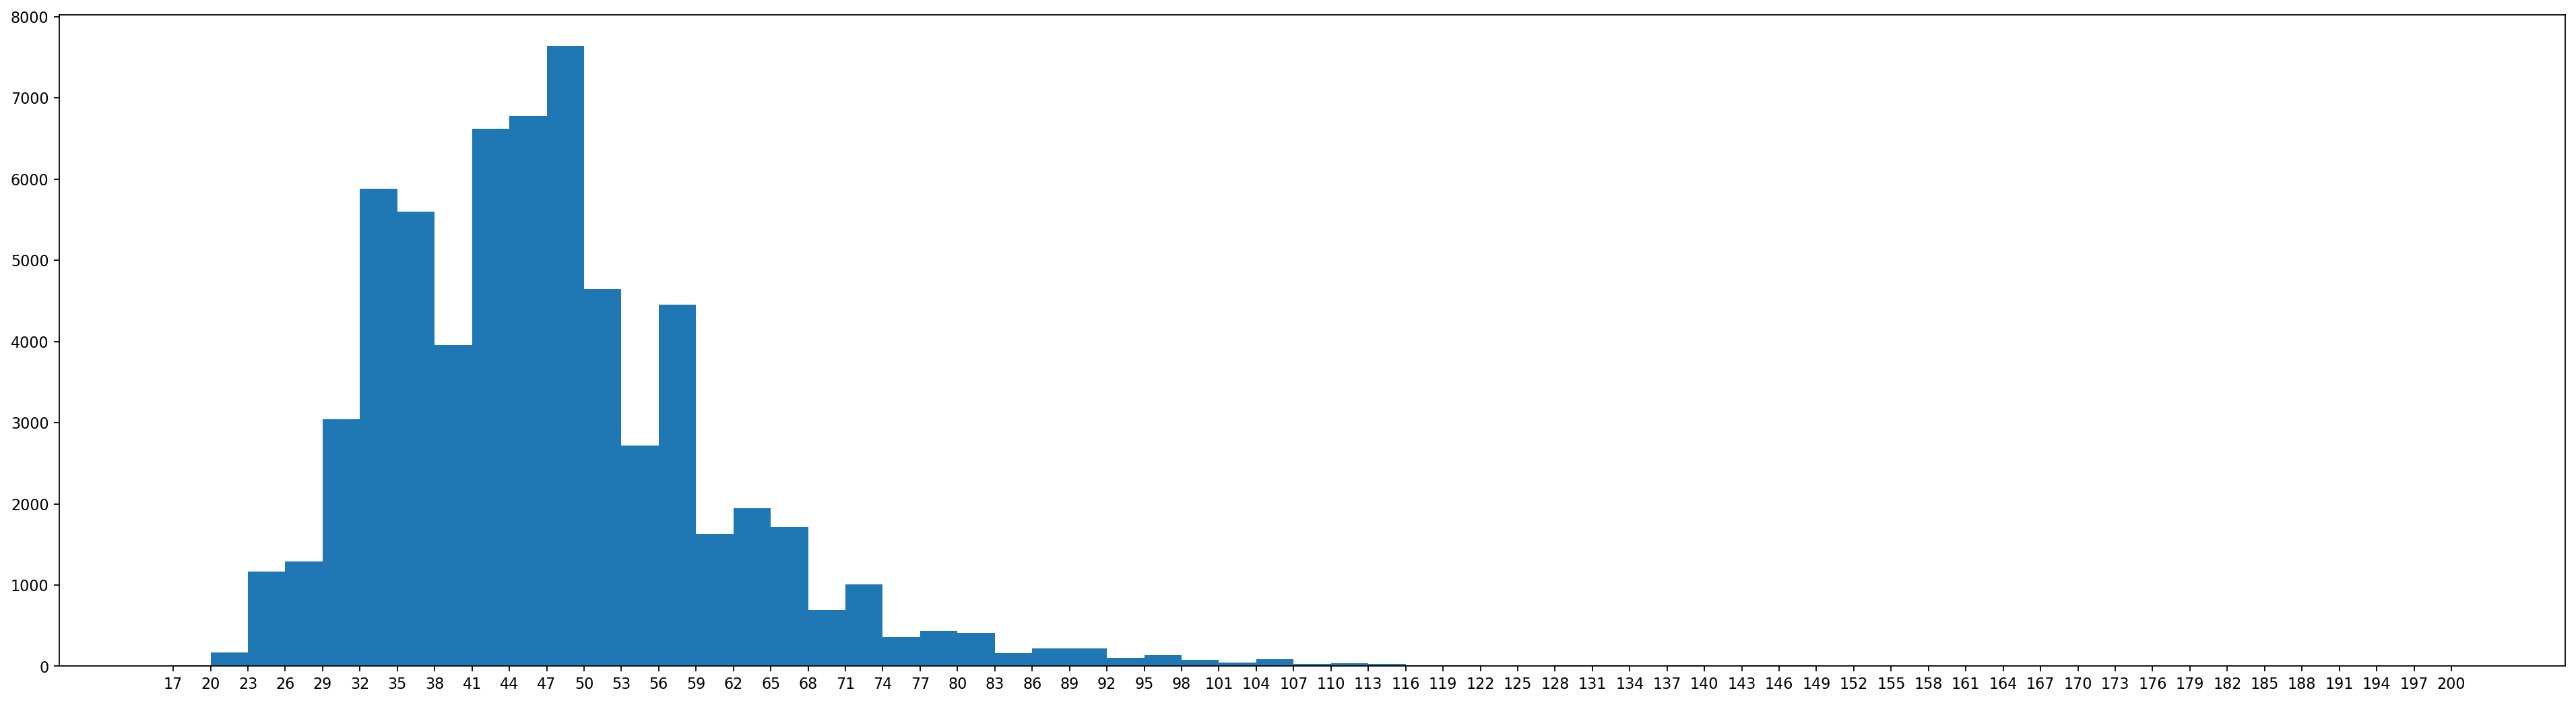

In [10]:
interval = 3
bin_num = (max(size_list)-min(size_list)) // interval
bins = [i for i in range(min(size_list), max(size_list)+interval, interval)]
fig = plt.figure(figsize=(30, 8), dpi=160)
plt.hist(size_list, bins=bins)
plt.xticks(ticks=bins)
plt.show()

In [11]:
print(max(size_list))

198


In [16]:
img_path = '/nfs3-p1/zsxm/dataset/aorta_classify_ct_-100_500/val/0/'

for img in os.listdir(img_path):
    nl = img.split('-')
    if len(nl) != 5:
        print(1, img)
    if '0'<= nl[0][-1] <='9':
        print(2, img)

In [18]:
old_img_list = []
new_img_list = []

old_list = ['/nfs3-p2/zsxm/dataset/aorta_classify_ct_-100_500/negative_deleted/train_0_backup',
            '/nfs3-p2/zsxm/dataset/aorta_classify_ct_-100_500/negative_deleted/val_0_backup']
new_list = ['/nfs3-p2/zsxm/dataset/aorta_classify_ct_-100_500/train/0', 
            '/nfs3-p2/zsxm/dataset/aorta_classify_ct_-100_500/val/0']
for path in old_list:
    for img in os.listdir(path):
        old_img_list.append(img)
for path in new_list:
    for img in os.listdir(path):
        new_img_list.append(img)
print(len(old_img_list), len(new_img_list))

33214 34036


In [19]:
for img in new_img_list:
    if img not in old_img_list:
        print(img)

baixiaoxu-22-31-52-147_j_0069.png
baojinjia-17-21-35-83_j_0056.png
bianzhaorong-17-22-38-92_s_0024.png
bianzhaorong-17-22-38-92_s_0025.png
bianzhaorong-17-22-38-92_s_0026.png
bianzhaorong-17-22-38-92_s_0027.png
bianzhaorong-17-22-38-92_s_0029.png
bianzhaorong-17-22-38-92_s_0030.png
bianzhaorong-17-22-38-92_j_0031.png
bianzhaorong-17-22-38-92_s_0032.png
bianzhaorong-17-22-38-92_j_0032.png
bianzhaorong-17-22-38-92_s_0033.png
bianzhaorong-17-22-38-92_j_0042.png
bianzhaorong-17-22-38-92_j_0043.png
bianzhaorong-17-22-38-92_j_0045.png
bianzhaorong-17-22-38-92_j_0063.png
bianzhaorong-17-22-38-92_j_0066.png
bianzhaorong-17-22-38-92_j_0067.png
caijinfei-34-42-51-155_s_0042.png
caijinfei-34-42-51-155_s_0044.png
caijinfei-34-42-51-155_s_0047.png
caijinfei-34-42-51-155_s_0048.png
caijinfei-34-42-51-155_j_0089.png
caijinfei-34-42-51-155_j_0090.png
caijinfei-34-42-51-155_j_0091.png
caijinfei-34-42-51-155_j_0092.png
caijinfei-34-42-51-155_j_0093.png
caijinfei-34-42-51-155_j_0094.png
caijinfei-34-42-5

luojinfeng-30-38-53-149_j_0108.png
luojinfeng-30-38-53-149_j_0125.png
luojinfeng-30-38-53-149_j_0126.png
luojun-22-29-51-139_j_0109.png
lushuyun-19-30-47-149_j_0094.png
lvbiqiang-34-42-63-143_s_0052.png
ningjiangui-18-23-30-83_j_0035.png
nisixiang-11-17-25-81_s_0018.png
nisixiang-11-17-25-81_s_0021.png
nisixiang-11-17-25-81_s_0022.png
nisixiang-11-17-25-81_j_0032.png
panxiangyang-45-53-97-196_s_0085.png
panxiangyang-45-53-97-196_j_0114.png
panxiangyang-45-53-97-196_j_0121.png
panyuda-29-36-52-102_j_0064.png
pengyufei-31-39-51-154_s_0041.png
pengyufei-31-39-51-154_s_0042.png
pengyufei-31-39-51-154_j_0042.png
pengyufei-31-39-51-154_s_0043.png
pengyufei-31-39-51-154_s_0045.png
pengyufei-31-39-51-154_j_0072.png
pengyufei-31-39-51-154_j_0081.png
pengyufei-31-39-51-154_j_0086.png
pengyufei-31-39-51-154_j_0088.png
pengyufei-31-39-51-154_j_0090.png
pengyufei-31-39-51-154_j_0092.png
pengyufei-31-39-51-154_j_0093.png
pengyufei-31-39-51-154_j_0094.png
pengyufei-31-39-51-154_j_0106.png
pengyufei-3

yukang-17-22-27-82_j_0062.png
yukang-27-36-46-135_j_0106.png
yukang-27-36-46-135_j_0109.png
yumengting-19-26-36-123_j_0070.png
yumengting-19-26-36-123_j_0071.png
yumengting-19-26-36-123_j_0087.png
yupengjie-26-34-46-134_j_0082.png
yupengjie-26-34-46-134_j_0083.png
yushengfu-31-40-56-154_j_0098.png
yushengfu-31-40-56-154_j_0108.png
yushengfu-31-40-56-154_j_0109.png
yuxiaotu-20-25-36-90_j_0078.png
yuyinglong-24-30-51-98_j_0054.png
yuyinglong-24-30-51-98_j_0081.png
yuyinglong-24-30-51-98_j_0083.png
yuyinglong-24-30-51-98_j_0085.png
yuyinglong-24-30-51-98_j_0086.png
yuyinglong-24-30-51-98_j_0087.png
yuyunfu-26-33-66-148_s_0035.png
zengchunsheng-23-30-41-128_j_0061.png
zengchunsheng-23-30-41-128_j_0062.png
zengchunsheng-23-30-41-128_j_0080.png
zengchunsheng-23-30-41-128_j_0081.png
zengchunsheng-23-30-41-128_j_0082.png
zengchunsheng-23-30-41-128_j_0084.png
zengchunsheng-23-30-41-128_j_0085.png
zengchunsheng-23-30-41-128_j_0086.png
zengchunsheng-23-30-41-128_j_0088.png
zengchunsheng-23-30-41-

yuweiliang-29-35-47-104_j_0073.png
zhangjingjing-16-19-30-78_s_0025.png
zhangjingjing-16-19-30-78_s_0026.png
zhangjunfei-25-33-52-125_j_0109.png
zhangkesheng-27-34-63-144_s_0044.png
zhangkesheng-27-34-63-144_j_0104.png
zhangkesheng-27-34-63-144_j_0117.png
zhangkesheng-27-34-63-144_j_0118.png
zhangkesheng-27-34-63-144_j_0120.png
zhangkesheng-27-34-63-144_j_0121.png
zhangkesheng-27-34-63-144_j_0122.png
zhangkesheng-27-34-63-144_j_0126.png
zhanglanxian-19-28-48-129_s_0035.png
zhanglanxian-19-28-48-129_j_0111.png
zhouhongqiong-31-42-54-147_s_0042.png
zhoushan-17-20-39-78_s_0032.png
zhoushan-17-20-39-78_s_0033.png
zhoushan-17-20-39-78_s_0034.png
zhoushan-17-20-39-78_j_0050.png
zhoushan-17-20-39-78_j_0059.png


In [20]:
for img in old_img_list:
    if img not in new_img_list:
        print(img)

caijingnan1-41-50-73-184_j_0146.png
chengzhiqiang-33-41-67-159_s_0057.png
chengzhiqiang-33-41-67-159_s_0058.png
dingbinghai-20-24-45-95_j_0074.png
huangjuzhen-13-17-29-77_s_0024.png
panxiangyang-45-53-97-196_j_0117.png
panxiangyang-45-53-97-196_j_0118.png
taoxiuwei-26-34-54-137_s_0039.png
taoxiuwei-26-34-54-137_s_0040.png
wangahai-16-22-43-91_j_0079.png
wangyouxiang-21-27-41-131_j_0102.png
wangyouxin-34-42-64-160_j_0120.png
wenshuijuan-30-36-66-145_s_0040.png
wenshuijuan-30-36-66-145_s_0053.png
wenshuijuan-30-36-66-145_s_0054.png
wenshuijuan-30-36-66-145_j_0075.png
yuanxiazhen-14-18-36-76_j_0039.png
zhoushan-17-20-39-78_j_0062.png
zhouxinya-24-30-40-120_s_0036.png
zhouxinya-24-30-40-120_j_0047.png
chenliuer-23-32-43-140_j_0087.png
fangzhengyi-26-37-53-153_j_0123.png
fangzhengyi-26-37-53-153_j_0124.png
jiangjiaqi-23-30-39-140_j_0114.png
jiangjiaqi-23-30-39-140_j_0115.png
jiangjiaqi-23-30-39-140_j_0116.png
jiangjiaqi-23-30-39-140_j_0117.png
lujuquan-25-35-50-126_j_0104.png
wangdandan-32-